In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math 
from scipy import stats
from scipy.optimize import curve_fit
from pylab import *
from scipy import special
#from rpy2.robjects.packages import importr
#from rpy2.robjects.vectors import FloatVector
from venn import venn
from venn import pseudovenn
import matplotlib.patches as mpatches

/Users/elimcdonald/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
def get_mock_runs(exp_df, mock_df, reps):
    exp_runs = [] 
    for i in exp_df:
        exp_runs.append(i.split(' ')[1])
    mock_runs = []
    mock_col = [x for x in list(mock_df.columns)]
    for i in exp_runs:
        for j in mock_col:
            if i == j.split(' ')[1]:
                mock_runs.append(j)
    elements = sorted(set(mock_runs), key=mock_runs.index)
    
    if reps ==1:
        new_mock_df = mock_df[elements]
    elif reps ==0:
        new_mock_df = mock_df[mock_runs]
    return new_mock_df 

# Read in data

In [6]:
#data = pd.read_excel('./CFTR-interactome-data_merged_20210524.xlsx', skiprows=2)
#data = pd.read_excel('./CFTR-interactome-data_merged_20210701.xlsx')
data = pd.read_excel('./CFTR-interactome-data_merged_20210705_2.xlsx')
#data = pd.read_excel('./CFTR-interactome-data_merged_20210726.xlsx')

In [7]:
Pankow_CFTR_core = pd.read_excel('./WT_CFTR_core_interactome.xlsx', sheet_name='Table S1')

In [8]:
Hutt_WT_CFTR_core = pd.read_excel('./Hutt_WT_CFTR_interactors.xlsx')

In [9]:
Hutt_F508del_CFTR_core = pd.read_excel('./Hutt_F508del_CFTR_interactors.xlsx')

In [10]:
Hutt_F508del_VX809_core = pd.read_excel('./Hutt_F508del_VX809_interactors.xlsx')

In [11]:
Hutt_core_interactome = np.concatenate([Hutt_WT_CFTR_core['Genenames'], Hutt_F508del_CFTR_core['Genenames'], Hutt_F508del_VX809_core['Genenames']])

In [12]:
Pankow_and_Hutt_core_interactome = np.concatenate([Pankow_CFTR_core['Official Gene symbol'], Hutt_core_interactome])

## drop run 7, 8, and 9

In [14]:
# drop runs 7,8, and 9 
keep_run = []
for i in data:
    if 'Run 7' not in i and 'Run 9' not in i and 'Run 8' not in i:
        keep_run.append(i)

In [15]:
data2 = data[keep_run]

## median normalize 

In [16]:
run_meds = {'Run 1': [], 'Run 2': [], 'Run 3': [], 'Run 4': [],
            'Run 5': [], 'Run 6': [], 'Run 10': [], 'Run 11': [], 'Run 12' : [], 'Run 13' : []}

for i in data2:
    if 'Run 1 ' in i:
        run_meds['Run 1'].append(data2[i].median())
    if 'Run 2 ' in i:
        run_meds['Run 2'].append(data2[i].median())
    if 'Run 3 ' in i:
        run_meds['Run 3'].append(data2[i].median())
    if 'Run 4 ' in i:
        run_meds['Run 4'].append(data2[i].median())
    if 'Run 5 ' in i:
        run_meds['Run 5'].append(data2[i].median())
    if 'Run 6 ' in i:
        run_meds['Run 6'].append(data2[i].median())
    if 'Run 10 ' in i:
        run_meds['Run 10'].append(data2[i].median())
    if 'Run 11 ' in i:
        run_meds['Run 11'].append(data2[i].median())
    if 'Run 12 ' in i:
        run_meds['Run 12'].append(data2[i].median())
    if 'Run 13 ' in i:
        run_meds['Run 13'].append(data2[i].median())

In [17]:
data3 = pd.DataFrame()
data3['Gene Name'] = data2['Gene Name']
for i in data2:
    if 'Run' in i:
        run = ' '.join(i.split(' ')[0:2])
        norm = np.mean(run_meds[run])/ data2[i].median()
        data3[i] = data2[i]*norm

# Define Conditions of Interest

In [18]:
WT_DMSO = []
WT_VX809 = []
F508del_DMSO = []
F508del_VX809 = []
P67L_DMSO = []
P67L_VX809 = [] 
L206W_DMSO = []
L206W_VX809 = [] 
G85E_DMSO = []
G85E_VX809 = [] 
mock = []
for i in data3:
    if "WT-DMSO" in i:
        WT_DMSO.append(i)
    if "WT-VX809" in i:
        WT_VX809.append(i)
    if "F508del-DMSO" in i:
        F508del_DMSO.append(i)
    if "F508del-VX809" in i:
        F508del_VX809.append(i)
    if 'td-tomato' in i or 'TD-tomato' in i:
        mock.append(i)
    if "P67L-DMSO" in i:
        P67L_DMSO.append(i)
    if "P67L-VX809" in i:
        P67L_VX809.append(i)
    if "L206W-DMSO" in i:
        L206W_DMSO.append(i)
    if "L206W-VX809" in i:
        L206W_VX809.append(i)
    if "G85E-DMSO" in i:
        G85E_DMSO.append(i)
    if "G85E-VX809" in i:
        G85E_VX809.append(i)

# WT CFTR + DMSO

In [19]:
TD_tom = np.log2(data3[mock])

In [20]:
WT_CFTR_DMSO = np.log2(data3[WT_DMSO])

In [21]:
WT_DMSO_mocks = get_mock_runs(WT_CFTR_DMSO, TD_tom,1)
WT_DMSO_over_TD = pd.DataFrame(WT_CFTR_DMSO.values - WT_DMSO_mocks.values)

In [22]:
stat_vals_WT_DMSO = stats.ttest_rel(WT_CFTR_DMSO.values, WT_DMSO_mocks.values, axis=1, nan_policy= 'omit', alternative='two-sided')

In [23]:
## filter out any proteins which were not identified in at least 2 runs 

WT_DMSO_over_TD_2plot = pd.DataFrame()
WT_DMSO_over_TD_2plot['nans'] = WT_DMSO_over_TD.isna().sum(axis=1)

drop_rows = []
for i,val in enumerate(WT_DMSO_over_TD_2plot['nans']):
    if val > len(WT_DMSO_over_TD.columns)-2:
        drop_rows.append(i)
        
WT_DMSO_over_TD = WT_DMSO_over_TD.drop(axis=0, index=drop_rows)

print('the number of interactors left = ' +str(len(WT_DMSO_over_TD)))



the number of interactors left = 2302


In [24]:
WT_DMSO_over_TD_2plot = pd.DataFrame()
WT_DMSO_over_TD_2plot['avg'] = WT_DMSO_over_TD.mean(axis=1)
WT_DMSO_over_TD_2plot['med'] = WT_DMSO_over_TD.median(axis=1)
WT_DMSO_over_TD_2plot['std'] = WT_DMSO_over_TD.std(axis=1)
WT_DMSO_over_TD_2plot['sum'] = WT_DMSO_over_TD.sum(axis=1)
WT_DMSO_over_TD_2plot['sum'] = WT_DMSO_over_TD_2plot['sum'].replace(0.0, np.nan)
WT_DMSO_over_TD_2plot['pvals'] = np.delete(np.array(stat_vals_WT_DMSO[1]), drop_rows)
WT_DMSO_over_TD_2plot['-log10 p_val'] = -np.log10(WT_DMSO_over_TD_2plot['pvals'])
#WT_DMSO_over_TD_2plot['-log10 p_val'] = WT_DMSO_over_TD_2plot['-log10 p_val'].replace(-1.0, np.nan)

Text(0.5, 1.0, 'Distribution of standard deviation log2(FC)')

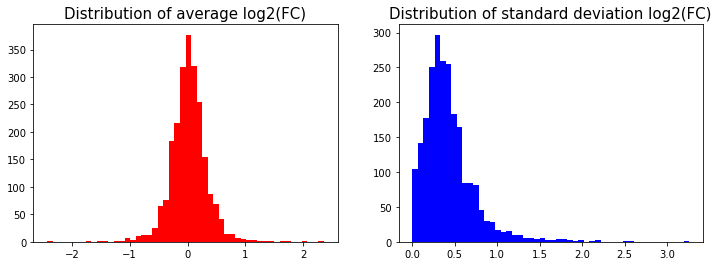

In [25]:
# plot the distribution of the average and stddev of the log fold changes
fig, ax = plt.subplots(1,2, figsize=(12,4))
bin_num =50
ax[0].hist(WT_DMSO_over_TD_2plot['avg'], bins=bin_num, color='r')
ax[0].set_title('Distribution of average log2(FC)',fontsize=15)
ax[1].hist(WT_DMSO_over_TD_2plot['std'], bins=bin_num, color ='b')
ax[1].set_title('Distribution of standard deviation log2(FC)',fontsize=15)


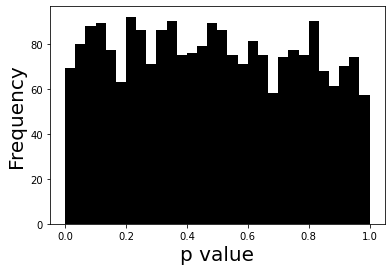

In [26]:
## plot a histogram of the p values 
plt.hist(WT_DMSO_over_TD_2plot['pvals'], bins=30, color='k')
plt.xlabel('p value', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()


In [27]:
upregulted_former_interactors = []

(array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 7 Text major ticklabel objects>)

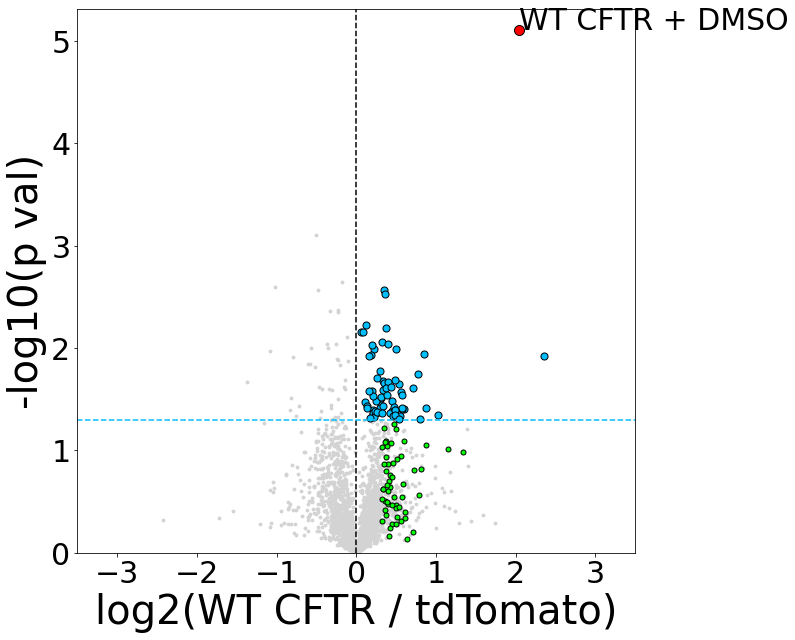

In [28]:
x = WT_DMSO_over_TD_2plot['avg']
y = WT_DMSO_over_TD_2plot['-log10 p_val']

cutoff = -np.log10(0.05)
rng = 3.5
fontsize = 40
plt.figure(figsize=(10,10))

plt.scatter(x,y, color = 'lightgrey', s=8)

plt.vlines((0), 0, max(y+0.2), ls='--' , color = 'k')
plt.hlines(cutoff, -rng, rng, ls='--' , color = 'deepskyblue')
plt.xlim(-rng,rng)
plt.ylim(0,max(y+0.2))
WT_DMSO_interactors = []


for i in x.items(): 
    if y[i[0]] >= cutoff and x[i[0]] >0: 
        plt.scatter(x[i[0]], y[i[0]], color = 'deepskyblue',edgecolor='k',s = 50)
        WT_DMSO_interactors.append(str(data2.iloc[i[0]]['Gene Name']))
        if data2.iloc[i[0]]['Gene Name'] == 'CFTR':
            plt.scatter(x[i[0]], y[i[0]], color = 'r', edgecolor='k', s=100)
            plt.text(x[i[0]],y[i[0]], 'WT CFTR + DMSO', size=fontsize-10, color ='k')
        #else: 
            #plt.text(x[i[0]],y[i[0]], str(data2.iloc[i[0]]['Gene Name'])[:6], size=fontsize-25)
            #print('Sabusap: ' + str(data2.iloc[i[0]]['Gene Name'])[:6])

    elif str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome and x[i[0]] > np.std(x):
        plt.scatter(x[i[0]], y[i[0]], color = 'lime',edgecolor='k',s =25)
        upregulted_former_interactors.append(str(data2.iloc[i[0]]['Gene Name']))
        #print('Pankow and Hutt: ' + str(data2.iloc[i[0]]['Gene Name'])[:6])

plt.xlabel('log2(WT CFTR / tdTomato)', size=fontsize)
plt.xticks(size=fontsize-10)
plt.ylabel('-log10(p val)', size=fontsize)
plt.yticks(size=fontsize-10)

#plt.savefig('../Figures/WT_CFTR_DMSO_volcano_plot.svg', format='svg')

# WT CFTR + VX809

In [29]:
TD_tom = np.log2(data3[mock])

In [30]:
WT_CFTR_VX809 = np.log2(data3[WT_VX809])

In [31]:
WT_VX809_mocks = get_mock_runs(WT_CFTR_VX809, TD_tom, 1)
WT_VX809_over_TD = pd.DataFrame(WT_CFTR_VX809.values - WT_VX809_mocks.values)

In [32]:
stat_vals_WT_VX809 = stats.ttest_rel(WT_CFTR_VX809.values,  WT_VX809_mocks.values, axis=1, nan_policy= 'omit', alternative='two-sided')

In [33]:
## filter out any proteins which were not identified in at least 3 runs 
WT_VX809_over_TD_2plot = pd.DataFrame()
WT_VX809_over_TD_2plot['nans'] = WT_VX809_over_TD.isna().sum(axis=1)

drop_rows = []
for i,val in enumerate(WT_VX809_over_TD_2plot['nans']):
    if val > len(WT_VX809_over_TD.columns)-2:
        drop_rows.append(i)
        
WT_VX809_over_TD = WT_VX809_over_TD.drop(axis=0, index=drop_rows)
print('the number of interactors left = ' + str(len(WT_VX809_over_TD)))

the number of interactors left = 1666


In [34]:
WT_VX809_over_TD_2plot = pd.DataFrame()
WT_VX809_over_TD_2plot['avg'] = WT_VX809_over_TD.mean(axis=1)
WT_VX809_over_TD_2plot['med'] = WT_VX809_over_TD.median(axis=1)
WT_VX809_over_TD_2plot['std'] = WT_VX809_over_TD.std(axis=1)
WT_VX809_over_TD_2plot['sum'] = WT_VX809_over_TD.sum(axis=1)
WT_VX809_over_TD_2plot['sum'] = WT_VX809_over_TD_2plot['sum'].replace(0.0, np.nan)
WT_VX809_over_TD_2plot['pvals'] = np.delete(np.array(stat_vals_WT_VX809[1]), drop_rows)
WT_VX809_over_TD_2plot['-log10 p_val'] = -np.log10(WT_VX809_over_TD_2plot['pvals'])
#WT_VX809_over_TD_2plot['-log10 p_val'] = WT_VX809_over_TD_2plot['-log10 p_val'].replace(-1.0, np.nan)

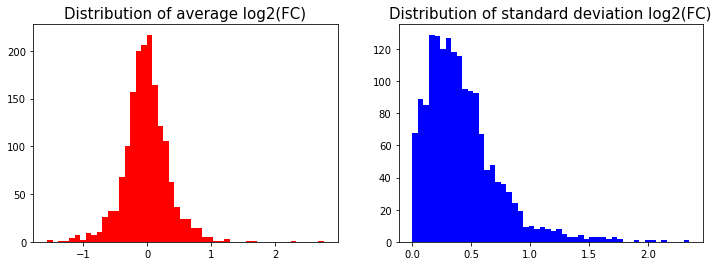

In [36]:
# plot the distribution of the average and stddev of the log fold changes
fig, ax = plt.subplots(1,2, figsize=(12,4))
bin_num =50
ax[0].hist(WT_VX809_over_TD_2plot['avg'], bins=bin_num, color='r')
ax[0].set_title('Distribution of average log2(FC)',fontsize=15)
ax[1].hist(WT_VX809_over_TD_2plot['std'], bins=bin_num, color ='b')
ax[1].set_title('Distribution of standard deviation log2(FC)',fontsize=15)
plt.show()

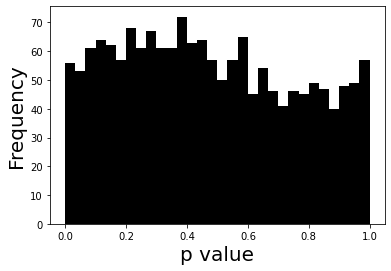

In [37]:
## plot a histogram of the p values 
plt.hist(WT_VX809_over_TD_2plot['pvals'], bins=30, color = 'k')
plt.xlabel('p value', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()


(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 <a list of 10 Text major ticklabel objects>)

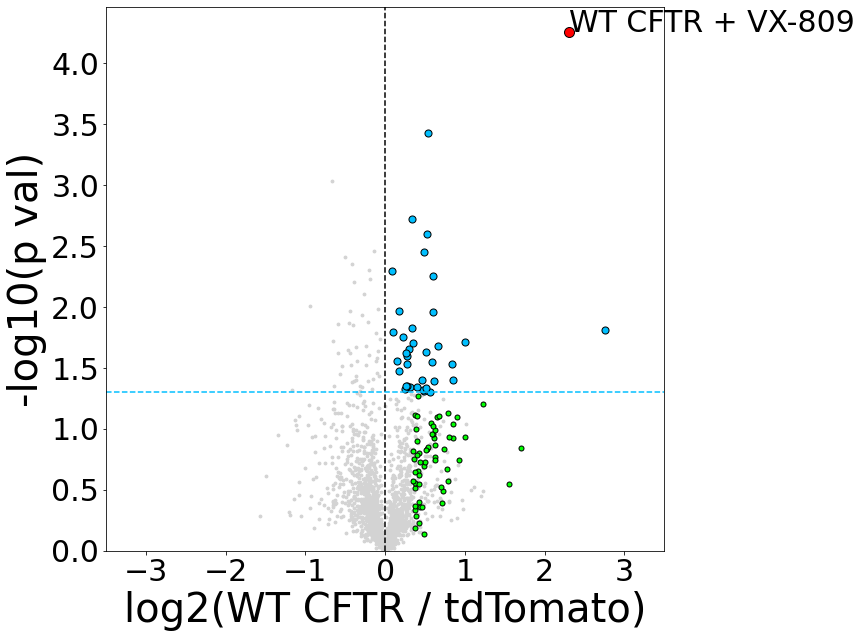

In [38]:
x = WT_VX809_over_TD_2plot['avg']
y = WT_VX809_over_TD_2plot['-log10 p_val']

cutoff = -np.log10(0.05)
rng = 3.5
fontsize = 40
plt.figure(figsize=(10,10))

plt.scatter(x,y, color = 'lightgrey', s=8)

plt.vlines((0), 0, max(y)+0.2, ls='--' , color = 'k')
plt.hlines(cutoff, -rng, rng, ls='--' , color = 'deepskyblue')
plt.xlim(-rng,rng)
plt.ylim(0,max(y+0.2))
WT_VX809_interactors = []
for i in x.items(): 
    if y[i[0]] >= cutoff and x[i[0]] >0: #y[i[0]] >= c/(x[i[0]]-x_std) and x[i[0]] >= x_std: 
        plt.scatter(x[i[0]], y[i[0]], color = 'deepskyblue',edgecolor='k',s = 50)
        WT_VX809_interactors.append(str(data2.iloc[i[0]]['Gene Name']))
        if data2.iloc[i[0]]['Gene Name'] == 'CFTR':
            plt.scatter(x[i[0]], y[i[0]], color = 'r', edgecolor='k', s=100)
            plt.text(x[i[0]],y[i[0]],'WT CFTR + VX-809', size=fontsize-10, color ='k')
        #else: 
         #   plt.text(x[i[0]],y[i[0]], str(data2.iloc[i[0]]['Gene Name'])[:6], size=fontsize-20)
            #print(str(data2.iloc[i[0]]['Gene Name'])[:6])
    elif str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome and x[i[0]] > np.std(x):
        plt.scatter(x[i[0]], y[i[0]], color = 'lime',edgecolor='k',s =25)
        upregulted_former_interactors.append(str(data2.iloc[i[0]]['Gene Name']))
plt.xlabel('log2(WT CFTR / tdTomato)', size=fontsize)
plt.xticks(size=fontsize-10)
plt.ylabel('-log10(p val)', size=fontsize)
plt.yticks(size=fontsize-10)
#plt.savefig('../Figures/WT_CFTR_VX809_volcano_plot.svg', format='svg')

# F508del CFTR + DMSO

In [39]:
TD_tom = np.log2(data3[mock])

In [40]:
F508del_CFTR_DMSO = np.log2(data3[F508del_DMSO])

In [41]:
F508del_DMSO_mocks = get_mock_runs(F508del_CFTR_DMSO, TD_tom,0)
F508del_DMSO_over_TD = pd.DataFrame(F508del_CFTR_DMSO.values - F508del_DMSO_mocks.values)

In [42]:
F508del_stat_vals_DMSO = stats.ttest_rel(F508del_CFTR_DMSO.values, F508del_DMSO_mocks.values, axis=1, nan_policy= 'omit')

In [43]:
## filter out any proteins which were not identified in at least 3 runs 
F508del_DMSO_over_TD_2plot = pd.DataFrame()
F508del_DMSO_over_TD_2plot['nans'] = F508del_DMSO_over_TD.isna().sum(axis=1)

drop_rows = []
for i,val in enumerate(F508del_DMSO_over_TD_2plot['nans']):
    if val >len(F508del_DMSO_over_TD.columns)-2:
        drop_rows.append(i)
        
F508del_DMSO_over_TD = F508del_DMSO_over_TD.drop(axis=0, index=drop_rows)
print('the number of interactors left = ' +str(len(F508del_DMSO_over_TD)))

the number of interactors left = 1487


In [44]:
## calculate some statistical properties...
F508del_DMSO_over_TD_2plot = pd.DataFrame()
F508del_DMSO_over_TD_2plot['avg'] = F508del_DMSO_over_TD.mean(axis=1)
F508del_DMSO_over_TD_2plot['med'] = F508del_DMSO_over_TD.median(axis=1)
F508del_DMSO_over_TD_2plot['std'] = F508del_DMSO_over_TD.std(axis=1)
F508del_DMSO_over_TD_2plot['pvals'] = np.delete(np.array(F508del_stat_vals_DMSO[1]), drop_rows)
F508del_DMSO_over_TD_2plot['-log10 p_val'] = -np.log10(F508del_DMSO_over_TD_2plot['pvals'])
#F508del_DMSO_over_TD_2plot['-log10 p_val'] = F508del_DMSO_over_TD_2plot['-log10 p_val'].replace(-1.0, np.nan)

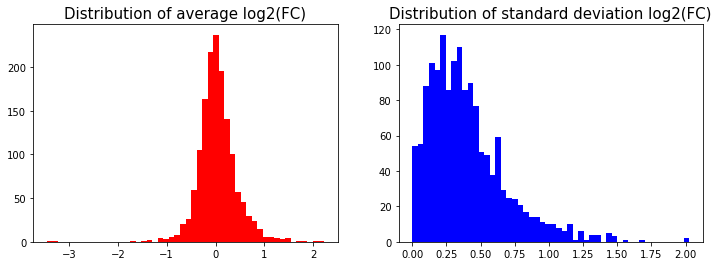

In [45]:
# plot the distribution of the average and stddev of the log fold changes
fig, ax = plt.subplots(1,2, figsize=(12,4))
bin_num =50
ax[0].hist(F508del_DMSO_over_TD_2plot['avg'], bins=bin_num, color='r')
ax[0].set_title('Distribution of average log2(FC)',fontsize=15)
ax[1].hist(F508del_DMSO_over_TD_2plot['std'], bins=bin_num, color ='b')
ax[1].set_title('Distribution of standard deviation log2(FC)',fontsize=15)
plt.show()

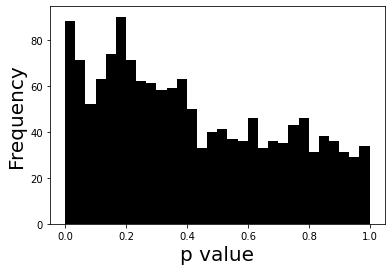

In [46]:
## plot a histogram of the p values 
plt.hist(F508del_DMSO_over_TD_2plot['pvals'], bins=30, color = 'k')
plt.xlabel('p value', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()

(array([0., 1., 2., 3., 4., 5.]), <a list of 6 Text major ticklabel objects>)

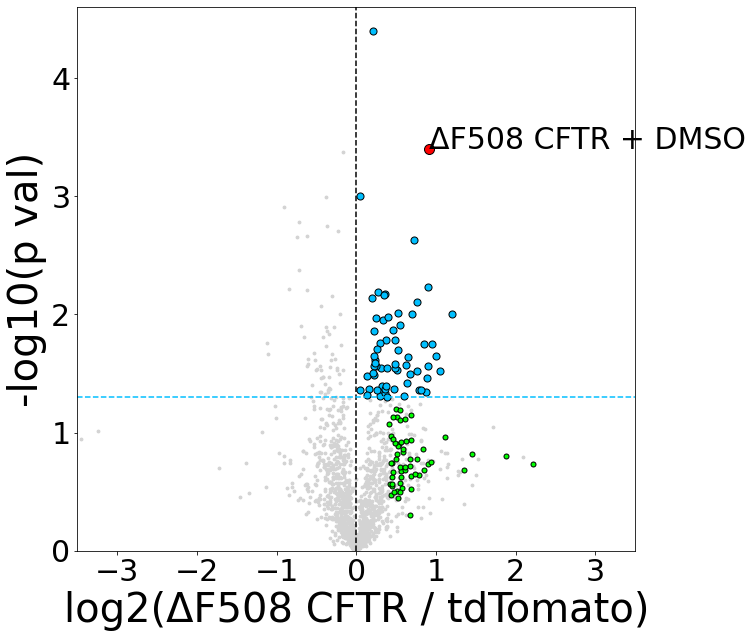

In [47]:
x = F508del_DMSO_over_TD_2plot['avg']
y = F508del_DMSO_over_TD_2plot['-log10 p_val']

cutoff = -np.log10(0.05)
rng = 3.5
fontsize = 40
plt.figure(figsize=(10,10))

plt.scatter(x,y, color = 'lightgrey', s=8)

plt.vlines((0), 0, max(y)+0.2, ls='--' , color = 'k')
plt.hlines(cutoff, -rng, rng, ls='--' , color = 'deepskyblue')
plt.xlim(-rng,rng)
plt.ylim(0,max(y)+0.2)
F508del_DMSO_interactors =[]
for i in x.items(): 
    if y[i[0]] >= cutoff and x[i[0]] >0: #y[i[0]] >= c/(x[i[0]]-x_std) and x[i[0]] >= x_std: 
        plt.scatter(x[i[0]], y[i[0]], color = 'deepskyblue',edgecolor='k',s = 50)
        F508del_DMSO_interactors.append(str(data2.iloc[i[0]]['Gene Name']))
        if data2.iloc[i[0]]['Gene Name'] == 'CFTR':
            plt.scatter(x[i[0]], y[i[0]], color = 'r', edgecolor='k', s=100)
            plt.text(x[i[0]],y[i[0]], '\u0394F508 CFTR + DMSO', size=fontsize-10, color ='k')
        #else: 
         #   plt.text(x[i[0]],y[i[0]], str(data2.iloc[i[0]]['Gene Name'])[:6], size=fontsize-20)
            #print(str(data2.iloc[i[0]]['Gene Name'])[:6])
    elif str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome and x[i[0]] > np.std(x):
        plt.scatter(x[i[0]], y[i[0]], color = 'lime',edgecolor='k',s =25)
        upregulted_former_interactors.append(str(data2.iloc[i[0]]['Gene Name']))
      
            

plt.xlabel('log2(\u0394F508 CFTR / tdTomato)', size=fontsize)
plt.xticks(size=fontsize-10)
plt.ylabel('-log10(p val)', size=fontsize)
plt.yticks(size=fontsize-10)
#plt.savefig('../Figures/F508del_CFTR_DSMO_volcano_plot.svg', format='svg')

# F508del CFTR + VX809

In [48]:
TD_tom = np.log2(data3[mock])

In [49]:
F508del_CFTR_VX809 = np.log2(data3[F508del_VX809])

In [50]:
F508del_VX809_mocks = get_mock_runs(F508del_CFTR_VX809, TD_tom,0)
F508del_VX809_over_TD = pd.DataFrame(F508del_CFTR_VX809.values - F508del_VX809_mocks.values)

In [51]:
F508del_stat_vals_VX809 = stats.ttest_rel(F508del_CFTR_VX809.values,  F508del_VX809_mocks.values, axis=1, nan_policy= 'omit')

In [52]:
## filter out any proteins which were not identified in at least 3 runs 
F508del_VX809_over_TD_2plot = pd.DataFrame()
F508del_VX809_over_TD_2plot['nans'] = F508del_VX809_over_TD.isna().sum(axis=1)

drop_rows = []
for i,val in enumerate(F508del_VX809_over_TD_2plot['nans']):
    if val >len(F508del_VX809_over_TD.columns)-2:
        drop_rows.append(i)
        
F508del_VX809_over_TD = F508del_VX809_over_TD.drop(axis=0, index=drop_rows)
print('the number of interactors left = ' +str(len(F508del_VX809_over_TD)))

the number of interactors left = 1486


In [53]:
F508del_VX809_over_TD_2plot = pd.DataFrame()
F508del_VX809_over_TD_2plot['avg'] = F508del_VX809_over_TD.mean(axis=1)
F508del_VX809_over_TD_2plot['std'] = F508del_VX809_over_TD.std(axis=1)
F508del_VX809_over_TD_2plot['med'] = F508del_VX809_over_TD.median(axis=1)
F508del_VX809_over_TD_2plot['sum'] = F508del_VX809_over_TD.sum(axis=1)
F508del_VX809_over_TD_2plot['sum'] = F508del_VX809_over_TD_2plot['sum'].replace(0.0, np.nan)
F508del_VX809_over_TD_2plot['pvals'] = np.delete(F508del_stat_vals_VX809[1], drop_rows)
F508del_VX809_over_TD_2plot['-log10 p_val'] = -np.log10(F508del_VX809_over_TD_2plot['pvals'])

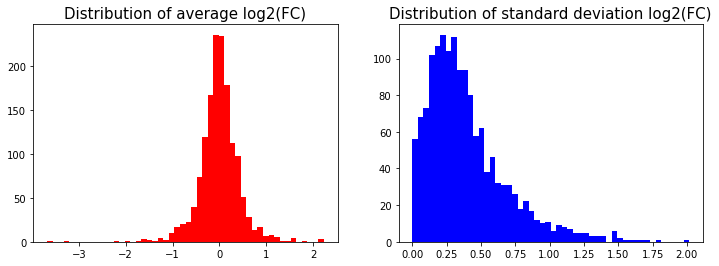

In [54]:
## plot the distribution of the average and stddev of the log fold changes
fig, ax = plt.subplots(1,2, figsize=(12,4))
bin_num =50
ax[0].hist(F508del_VX809_over_TD_2plot['avg'], bins=bin_num, color='r')
ax[0].set_title('Distribution of average log2(FC)',fontsize=15)
ax[1].hist(F508del_VX809_over_TD_2plot['std'], bins=bin_num, color ='b')
ax[1].set_title('Distribution of standard deviation log2(FC)',fontsize=15)
plt.show()

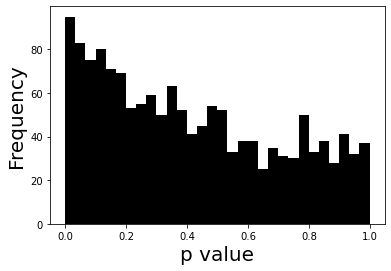

In [55]:
## plot a histogram of the p values 
plt.hist(F508del_VX809_over_TD_2plot['pvals'], bins=30, color = 'k')
plt.xlabel('p value', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()

(array([0., 1., 2., 3., 4., 5.]), <a list of 6 Text major ticklabel objects>)

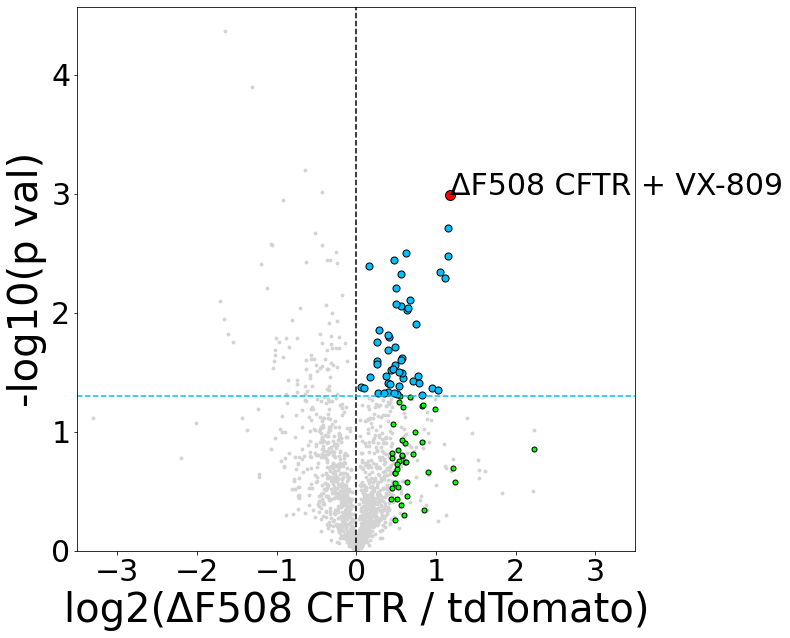

In [56]:
x = F508del_VX809_over_TD_2plot['avg']
y = F508del_VX809_over_TD_2plot['-log10 p_val']

x = x.replace(np.inf, np.nan)
y = y.replace(np.inf, np.nan)

cutoff = -np.log10(0.05)
rng = 3.5
fontsize = 40
plt.figure(figsize=(10,10))

plt.scatter(x,y, color = 'lightgrey', s=8)

plt.vlines((0), 0, max(y)+0.2, ls='--' , color = 'k')
plt.hlines(cutoff, -rng, rng, ls='--' , color = 'deepskyblue')
plt.xlim(-rng,rng)
plt.ylim(0,max(y)+0.2)
F508del_VX809_interactors =[]
for i in x.items(): 
    if y[i[0]] >= cutoff and x[i[0]] >0: #y[i[0]] >= c/(x[i[0]]-x_std) and x[i[0]] >= x_std: 
        plt.scatter(x[i[0]], y[i[0]], color = 'deepskyblue',edgecolor='k',s = 50)
        F508del_VX809_interactors.append(str(data2.iloc[i[0]]['Gene Name']))
        if data2.iloc[i[0]]['Gene Name'] == 'CFTR':
            plt.scatter(x[i[0]], y[i[0]], color = 'r', edgecolor='k', s=100)
            plt.text(x[i[0]],y[i[0]], '\u0394F508 CFTR + VX-809', size=fontsize-10, color ='k')
        #else: 
         #   plt.text(x[i[0]],y[i[0]], str(data2.iloc[i[0]]['Gene Name'])[:6], size=fontsize-20)
            #print(str(data2.iloc[i[0]]['Gene Name'])[:6])
    elif str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome and x[i[0]] > np.std(x):
        plt.scatter(x[i[0]], y[i[0]], color = 'lime',edgecolor='k',s =25)
        upregulted_former_interactors.append(str(data2.iloc[i[0]]['Gene Name']))
            

plt.xlabel('log2(\u0394F508 CFTR / tdTomato)', size=fontsize)
plt.xticks(size=fontsize-10)
plt.ylabel('-log10(p val)', size=fontsize)
plt.yticks(size=fontsize-10)
#plt.savefig('../Figures/F508del_CFTR_VX809_volcano_plot.svg', format='svg')

## P67L CFTR + DMSO

In [57]:
TD_tom = np.log2(data3[mock])

In [58]:
P67L_CFTR_DMSO = np.log2(data3[P67L_DMSO])

In [59]:
P67L_DMSO_mocks = get_mock_runs(P67L_CFTR_DMSO, TD_tom,0)
P67L_DMSO_over_TD = pd.DataFrame(P67L_CFTR_DMSO.values - P67L_DMSO_mocks.values)

In [60]:
P67L_stat_vals_DMSO = stats.ttest_rel(P67L_CFTR_DMSO.values, P67L_DMSO_mocks.values, axis=1, nan_policy= 'omit')

In [61]:
## filter out any proteins which were not identified in at least 3 runs 
P67L_DMSO_over_TD_2plot = pd.DataFrame()
P67L_DMSO_over_TD_2plot['nans'] =P67L_DMSO_over_TD.isna().sum(axis=1)

drop_rows = []
for i,val in enumerate(P67L_DMSO_over_TD_2plot['nans']):
    if val > len(P67L_DMSO_over_TD.columns)-2:
        drop_rows.append(i)
        
P67L_DMSO_over_TD = P67L_DMSO_over_TD.drop(axis=0, index=drop_rows)
print('the number of interactors left = ' +str(len(P67L_DMSO_over_TD)))

the number of interactors left = 1778


In [62]:
P67L_DMSO_over_TD_2plot = pd.DataFrame()
P67L_DMSO_over_TD_2plot['avg'] = P67L_DMSO_over_TD.mean(axis=1)
P67L_DMSO_over_TD_2plot['med'] = P67L_DMSO_over_TD.median(axis=1)
P67L_DMSO_over_TD_2plot['std'] = P67L_DMSO_over_TD.std(axis=1)
P67L_DMSO_over_TD_2plot['pvals'] = np.delete(np.array(P67L_stat_vals_DMSO[1]), drop_rows)
P67L_DMSO_over_TD_2plot['-log10 p_val'] = -np.log10(P67L_DMSO_over_TD_2plot['pvals'])

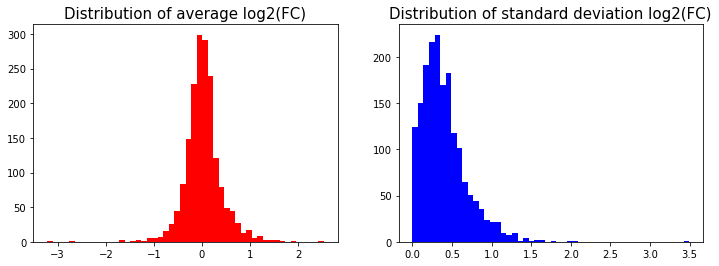

In [64]:
## plot the distribution of the average and stddev of the log fold changes
fig, ax = plt.subplots(1,2, figsize=(12,4))
bin_num =50
ax[0].hist(P67L_DMSO_over_TD_2plot['avg'], bins=bin_num, color='r')
ax[0].set_title('Distribution of average log2(FC)',fontsize=15)
ax[1].hist(P67L_DMSO_over_TD_2plot['std'], bins=bin_num, color ='b')
ax[1].set_title('Distribution of standard deviation log2(FC)',fontsize=15)
plt.show()

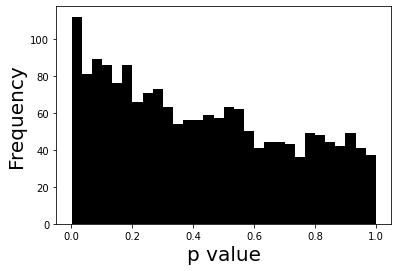

In [65]:
## plot a histogram of the p values 
plt.hist(P67L_DMSO_over_TD_2plot['pvals'], bins=30, color = 'k')
plt.xlabel('p value', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 9 Text major ticklabel objects>)

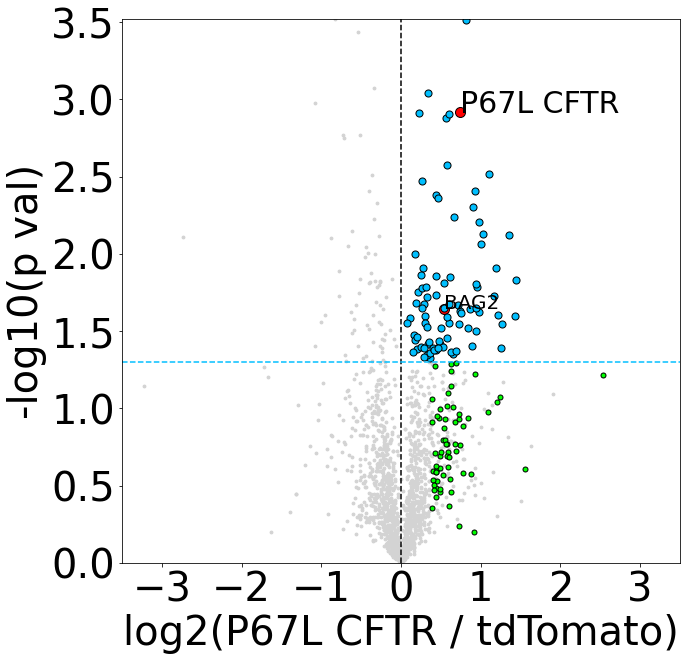

In [66]:
x = P67L_DMSO_over_TD_2plot['avg']
y = P67L_DMSO_over_TD_2plot['-log10 p_val']

cutoff = -np.log10(0.05)
rng = 3.5
fontsize = 40
plt.figure(figsize=(10,10))

plt.scatter(x,y, color = 'lightgrey', s=8)

plt.vlines((0), 0, max(y), ls='--' , color = 'k')
plt.hlines(cutoff, -rng, rng, ls='--' , color = 'deepskyblue')
plt.xlim(-rng,rng)
plt.ylim(0,max(y))
P67L_DMSO_interactors =[]
for i in x.items(): 
    if y[i[0]] >= cutoff and x[i[0]] >0: #y[i[0]] >= c/(x[i[0]]-x_std) and x[i[0]] >= x_std: 
        plt.scatter(x[i[0]], y[i[0]], color = 'deepskyblue',edgecolor='k',s = 50)
        P67L_DMSO_interactors.append(str(data2.iloc[i[0]]['Gene Name']))
        if data2.iloc[i[0]]['Gene Name'] == 'CFTR':
            plt.scatter(x[i[0]], y[i[0]], color = 'r', edgecolor='k', s=100)
            plt.text(x[i[0]],y[i[0]], 'P67L CFTR', size=fontsize-10, color ='k')
            
        if data2.iloc[i[0]]['Gene Name'] == 'BAG2':
            plt.scatter(x[i[0]], y[i[0]], color = 'r', edgecolor='k', s=100)
            plt.text(x[i[0]],y[i[0]], 'BAG2', size=fontsize-20, color ='k')
        #else: 
         #   plt.text(x[i[0]],y[i[0]], str(data2.iloc[i[0]]['Gene Name'])[:6], size=fontsize-20)
            #print("Sabusap: " + str(data2.iloc[i[0]]['Gene Name'])[:6])
    elif str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome and x[i[0]] > np.std(x):
        plt.scatter(x[i[0]], y[i[0]], color = 'lime',edgecolor='k',s =25)
        upregulted_former_interactors.append(str(data2.iloc[i[0]]['Gene Name']))
        #print("Pankow and Hutt: " + str(data2.iloc[i[0]]['Gene Name'])[:6])

plt.xlabel('log2(P67L CFTR / tdTomato)', size=fontsize)
plt.xticks(size=fontsize)
plt.ylabel('-log10(p val)', size=fontsize)
plt.yticks(size=fontsize)
#plt.savefig('../Figures/P67L_CFTR_DMSO_volcano_plot_BAG2.svg', format='svg')

# P67L CFTR + VX-809

In [67]:
TD_tom = np.log2(data3[mock])

In [68]:
P67L_CFTR_VX809 = np.log2(data3[P67L_VX809])

In [69]:
P67L_VX809_mocks = get_mock_runs(P67L_CFTR_VX809, TD_tom,0)
P67L_VX809_over_TD = pd.DataFrame(P67L_CFTR_VX809.values - P67L_VX809_mocks.values)

In [70]:
P67L_stat_vals_VX809 = stats.ttest_rel(P67L_CFTR_VX809.values,  P67L_VX809_mocks.values, axis=1, nan_policy= 'omit')

In [71]:
## filter out any proteins which were not identified in at least 3 runs 
P67L_VX809_over_TD_2plot = pd.DataFrame()
P67L_VX809_over_TD_2plot['nans'] = P67L_VX809_over_TD.isna().sum(axis=1)

drop_rows = []
for i,val in enumerate(P67L_VX809_over_TD_2plot['nans']):
    if val > len(P67L_VX809_over_TD.columns)-2:
        drop_rows.append(i)
        
P67L_VX809_over_TD = P67L_VX809_over_TD.drop(axis=0, index=drop_rows)
print('the number of interactors left = ' +str(len(P67L_VX809_over_TD)))

the number of interactors left = 1778


In [72]:
P67L_VX809_over_TD_2plot = pd.DataFrame()
P67L_VX809_over_TD_2plot['avg'] = P67L_VX809_over_TD.mean(axis=1)
P67L_VX809_over_TD_2plot['med'] = P67L_VX809_over_TD.median(axis=1)
P67L_VX809_over_TD_2plot['std'] = P67L_VX809_over_TD.std(axis=1)
P67L_VX809_over_TD_2plot['pvals'] = np.delete(np.array(P67L_stat_vals_VX809[1]), drop_rows)
P67L_VX809_over_TD_2plot['-log10 p_val'] = -np.log10(P67L_VX809_over_TD_2plot['pvals'])

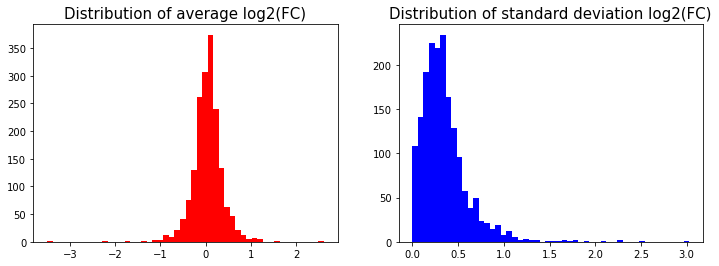

In [73]:
## plot the distribution of the average and stddev of the log fold changes
fig, ax = plt.subplots(1,2, figsize=(12,4))
bin_num =50
ax[0].hist(P67L_VX809_over_TD_2plot['avg'], bins=bin_num, color='r')
ax[0].set_title('Distribution of average log2(FC)',fontsize=15)
ax[1].hist(P67L_VX809_over_TD_2plot['std'], bins=bin_num, color ='b')
ax[1].set_title('Distribution of standard deviation log2(FC)',fontsize=15)
plt.show()

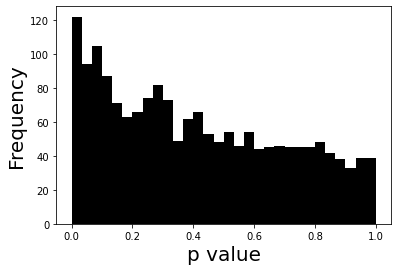

In [74]:
## plot a histogram of the p values 
plt.hist(P67L_VX809_over_TD_2plot['pvals'], bins=30, color = 'k')
plt.xlabel('p value', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 <a list of 10 Text major ticklabel objects>)

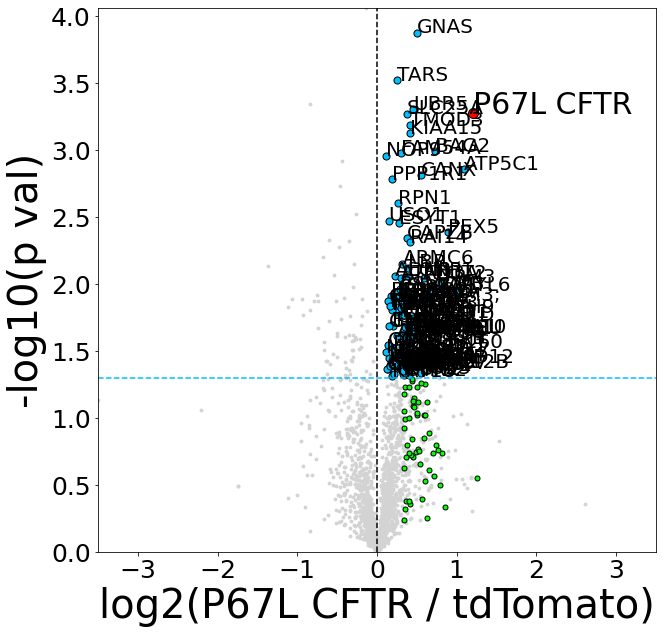

In [75]:
x = P67L_VX809_over_TD_2plot['avg']
y = P67L_VX809_over_TD_2plot['-log10 p_val']

cutoff = -np.log10(0.05)
rng = 3.5
fontsize = 40
plt.figure(figsize=(10,10))

plt.scatter(x,y, color = 'lightgrey', s=8)

plt.vlines((0), 0, max(y), ls='--' , color = 'k')
plt.hlines(cutoff, -rng, rng, ls='--' , color = 'deepskyblue')
plt.xlim(-rng,rng)
plt.ylim(0,max(y))
P67L_VX809_interactors =[]
for i in x.items(): 
    if y[i[0]] >= cutoff and x[i[0]] >0: #y[i[0]] >= c/(x[i[0]]-x_std) and x[i[0]] >= x_std: 
        plt.scatter(x[i[0]], y[i[0]], color = 'deepskyblue',edgecolor='k',s = 50)
        P67L_VX809_interactors.append(str(data2.iloc[i[0]]['Gene Name']))
        if data2.iloc[i[0]]['Gene Name'] == 'CFTR':
            plt.scatter(x[i[0]], y[i[0]], color = 'r', edgecolor='k', s=100)
            plt.text(x[i[0]],y[i[0]], 'P67L CFTR', size=fontsize-10, color ='k')
        else: 
            plt.text(x[i[0]],y[i[0]], str(data2.iloc[i[0]]['Gene Name'])[:6], size=fontsize-20)
            #print("Sabusap: " + str(data2.iloc[i[0]]['Gene Name'])[:6])
    elif str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome and x[i[0]] > np.std(x):
        plt.scatter(x[i[0]], y[i[0]], color = 'lime',edgecolor='k',s =25)
        upregulted_former_interactors.append(str(data2.iloc[i[0]]['Gene Name']))
        #rint("Pankow and Hutt: " + str(data2.iloc[i[0]]['Gene Name'])[:6])

plt.xlabel('log2(P67L CFTR / tdTomato)', size=fontsize)
plt.xticks(size=fontsize-15)
plt.ylabel('-log10(p val)', size=fontsize)
plt.yticks(size=fontsize-15)
#plt.savefig('../Figures/P67L_CFTR_VX809_volcano_plot.svg', format='svg')

In [76]:
VX809_F508del_P67L_venn_dict = {}
VX809_F508del_P67L_venn_dict['WT + DMSO'] = set(WT_DMSO_interactors)
VX809_F508del_P67L_venn_dict['P67L + DMSO'] = set(P67L_DMSO_interactors)
VX809_F508del_P67L_venn_dict['P67L + VX-809'] = set(P67L_VX809_interactors)
#VX809_F508del_P67L_venn_dict['F508del + DMSO'] = set(F508del_DMSO_interactors)
#VX809_F508del_P67L_venn_dict['F508del + VX-809'] = set(F508del_VX809_interactors)

#VX809_F508del_P67L_venn_dict['WT + VX-809'] = set(WT_VX809_interactors)'''

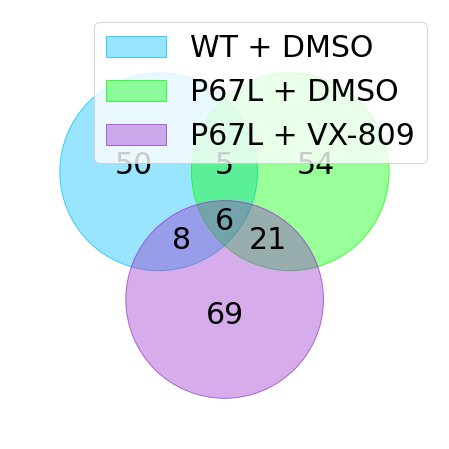

In [78]:
venn(VX809_F508del_P67L_venn_dict, cmap=['deepskyblue', 'lime','darkorchid', ],fontsize=30)
#plt.savefig('../Figures/P67L_VX809_WT_venn_diagram.svg', format='svg')

# L206W + DMSO

In [79]:
TD_tom = np.log2(data3[mock])

In [80]:
L206W_CFTR_DMSO = np.log2(data3[L206W_DMSO])

In [81]:
L206W_DMSO_mocks = get_mock_runs(L206W_CFTR_DMSO, TD_tom,0)
L206W_DMSO_over_TD = pd.DataFrame(L206W_CFTR_DMSO.values - L206W_DMSO_mocks.values)

In [82]:
L206W_stat_vals_DMSO = stats.ttest_rel(L206W_CFTR_DMSO.values, L206W_DMSO_mocks.values, axis=1, nan_policy= 'omit')

In [83]:
# filter out any proteins which were not identified in at least 3 runs 
L206W_DMSO_over_TD_2plot = pd.DataFrame()
L206W_DMSO_over_TD_2plot['nans'] = L206W_DMSO_over_TD.isna().sum(axis=1)

drop_rows = []
for i,val in enumerate(L206W_DMSO_over_TD_2plot['nans']):
    if val > len(L206W_DMSO_over_TD.columns)-2:
        drop_rows.append(i)
        
L206W_DMSO_over_TD = L206W_DMSO_over_TD.drop(axis=0, index=drop_rows)
print('the number of interactors left = ' +str(len(L206W_DMSO_over_TD)))

the number of interactors left = 2353


In [84]:
L206W_DMSO_over_TD_2plot = pd.DataFrame()
L206W_DMSO_over_TD_2plot['avg'] = L206W_DMSO_over_TD.mean(axis=1)
L206W_DMSO_over_TD_2plot['med'] = L206W_DMSO_over_TD.median(axis=1)
L206W_DMSO_over_TD_2plot['std'] = L206W_DMSO_over_TD.std(axis=1)
L206W_DMSO_over_TD_2plot['pvals'] = np.delete(np.array(L206W_stat_vals_DMSO[1]), drop_rows)
L206W_DMSO_over_TD_2plot['-log10 p_val'] = -np.log10(L206W_DMSO_over_TD_2plot['pvals'])


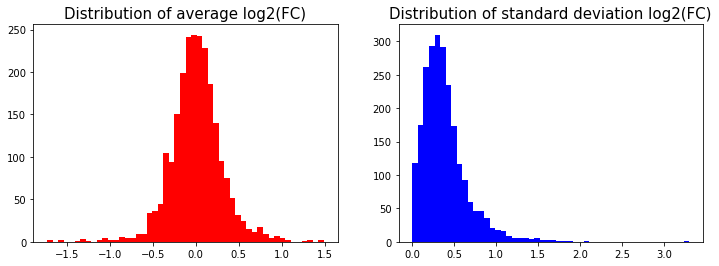

In [85]:
## plot the distribution of the average and stddev of the log fold changes
fig, ax = plt.subplots(1,2, figsize=(12,4))
bin_num =50
ax[0].hist(L206W_DMSO_over_TD_2plot['avg'], bins=bin_num, color='r')
ax[0].set_title('Distribution of average log2(FC)',fontsize=15)
ax[1].hist(L206W_DMSO_over_TD_2plot['std'], bins=bin_num, color ='b')
ax[1].set_title('Distribution of standard deviation log2(FC)',fontsize=15)
plt.show()

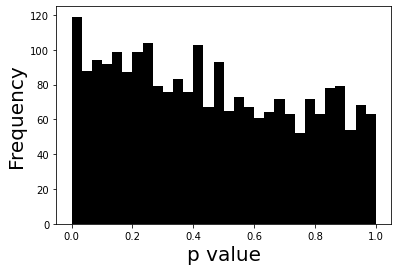

In [86]:
## plot a histogram of the p values 
plt.hist(L206W_DMSO_over_TD_2plot['pvals'], bins=30, color = 'k')
plt.xlabel('p value', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 9 Text major ticklabel objects>)

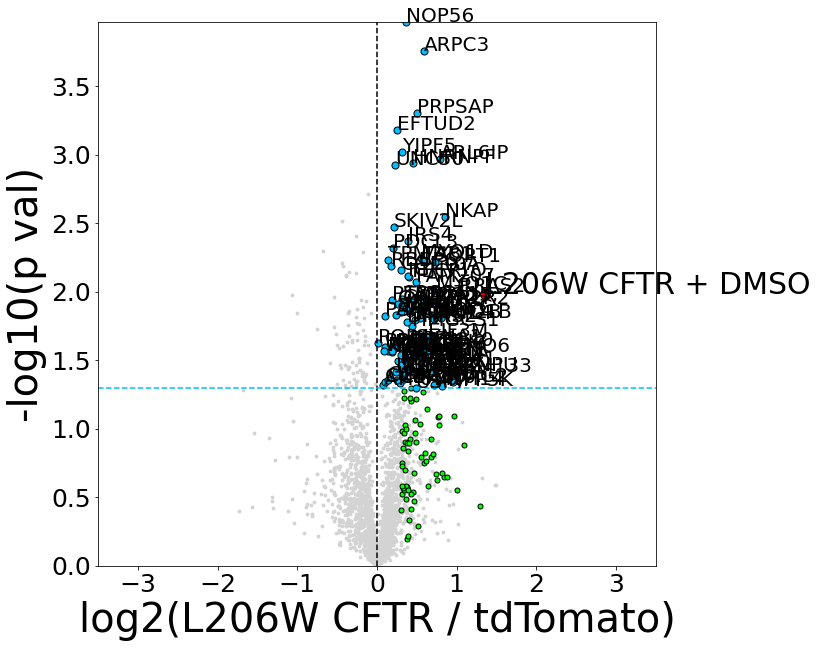

In [87]:
x = L206W_DMSO_over_TD_2plot['avg']
y = L206W_DMSO_over_TD_2plot['-log10 p_val']

cutoff = -np.log10(0.05)
rng = 3.5
fontsize = 40
plt.figure(figsize=(10,10))

plt.scatter(x,y, color = 'lightgrey', s=8)

plt.vlines((0), 0, max(y), ls='--' , color = 'k')
plt.hlines(cutoff, -rng, rng, ls='--' , color = 'deepskyblue')
plt.xlim(-rng,rng)
plt.ylim(0,max(y))
L206W_DMSO_interactors =[]
for i in x.items(): 
    if y[i[0]] >= cutoff and x[i[0]] >0: #y[i[0]] >= c/(x[i[0]]-x_std) and x[i[0]] >= x_std: 
        plt.scatter(x[i[0]], y[i[0]], color = 'deepskyblue',edgecolor='k',s = 50)
        L206W_DMSO_interactors.append(str(data2.iloc[i[0]]['Gene Name']))
        if data2.iloc[i[0]]['Gene Name'] == 'CFTR':
            plt.scatter(x[i[0]], y[i[0]], color = 'r', edgecolor='k', s=100)
            plt.text(x[i[0]],y[i[0]], 'L206W CFTR + DMSO', size=fontsize-10, color ='k')
        else: 
            plt.text(x[i[0]],y[i[0]], str(data2.iloc[i[0]]['Gene Name'])[:6], size=fontsize-20)
            #print("Sabusap: " + str(data2.iloc[i[0]]['Gene Name'])[:6])
    elif str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome and x[i[0]] > np.std(x):
        plt.scatter(x[i[0]], y[i[0]], color = 'lime',edgecolor='k',s =25)
        upregulted_former_interactors.append(str(data2.iloc[i[0]]['Gene Name']))
        #rint("Pankow and Hutt: " + str(data2.iloc[i[0]]['Gene Name'])[:6])

plt.xlabel('log2(L206W CFTR / tdTomato)', size=fontsize)
plt.xticks(size=fontsize-15)
plt.ylabel('-log10(p val)', size=fontsize)
plt.yticks(size=fontsize-15)
#plt.savefig('../Figures/L206W_CFTR_DMSO_volcano_plot.svg', format='svg')

# L206W + VX809

In [88]:
TD_tom = np.log2(data3[mock])

In [89]:
L206W_CFTR_VX809 = np.log2(data3[L206W_VX809])

In [90]:
L206W_VX809_mocks = get_mock_runs(L206W_CFTR_VX809, TD_tom,0)
L206W_VX809_over_TD = pd.DataFrame(L206W_CFTR_VX809.values - L206W_VX809_mocks.values)

In [91]:
L206W_stat_vals_VX809 = stats.ttest_rel(L206W_CFTR_VX809.values, L206W_VX809_mocks.values, axis=1, nan_policy= 'omit')

In [92]:
# filter out any proteins which were not identified in at least 3 runs 
L206W_VX809_over_TD_2plot = pd.DataFrame()
L206W_VX809_over_TD_2plot['nans'] = L206W_VX809_over_TD.isna().sum(axis=1)

drop_rows = []
for i,val in enumerate(L206W_VX809_over_TD_2plot['nans']):
    if val > len(L206W_VX809_over_TD.columns)-2:
        drop_rows.append(i)
        
L206W_VX809_over_TD = L206W_VX809_over_TD.drop(axis=0, index=drop_rows)
print('the number of interactors left = ' +str(len(L206W_VX809_over_TD)))

the number of interactors left = 2357


In [93]:
L206W_VX809_over_TD_2plot = pd.DataFrame()
L206W_VX809_over_TD_2plot['avg'] = L206W_VX809_over_TD.mean(axis=1)
L206W_VX809_over_TD_2plot['med'] = L206W_VX809_over_TD.median(axis=1)
L206W_VX809_over_TD_2plot['std'] = L206W_VX809_over_TD.std(axis=1)
L206W_VX809_over_TD_2plot['pvals'] = np.delete(np.array(L206W_stat_vals_VX809[1]), drop_rows)
L206W_VX809_over_TD_2plot['-log10 p_val'] = -np.log10(L206W_VX809_over_TD_2plot['pvals'])

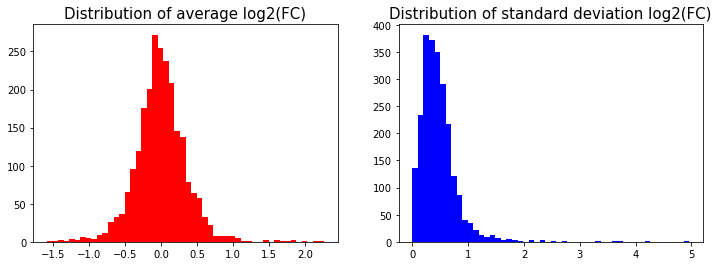

In [94]:
## plot the distribution of the average and stddev of the log fold changes
fig, ax = plt.subplots(1,2, figsize=(12,4))
bin_num =50
ax[0].hist(L206W_VX809_over_TD_2plot['avg'], bins=bin_num, color='r')
ax[0].set_title('Distribution of average log2(FC)',fontsize=15)
ax[1].hist(L206W_VX809_over_TD_2plot['std'], bins=bin_num, color ='b')
ax[1].set_title('Distribution of standard deviation log2(FC)',fontsize=15)
plt.show()

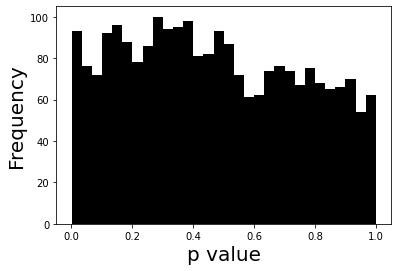

In [95]:
## plot a histogram of the p values 
plt.hist(L206W_VX809_over_TD_2plot['pvals'], bins=30, color = 'k')
plt.xlabel('p value', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 9 Text major ticklabel objects>)

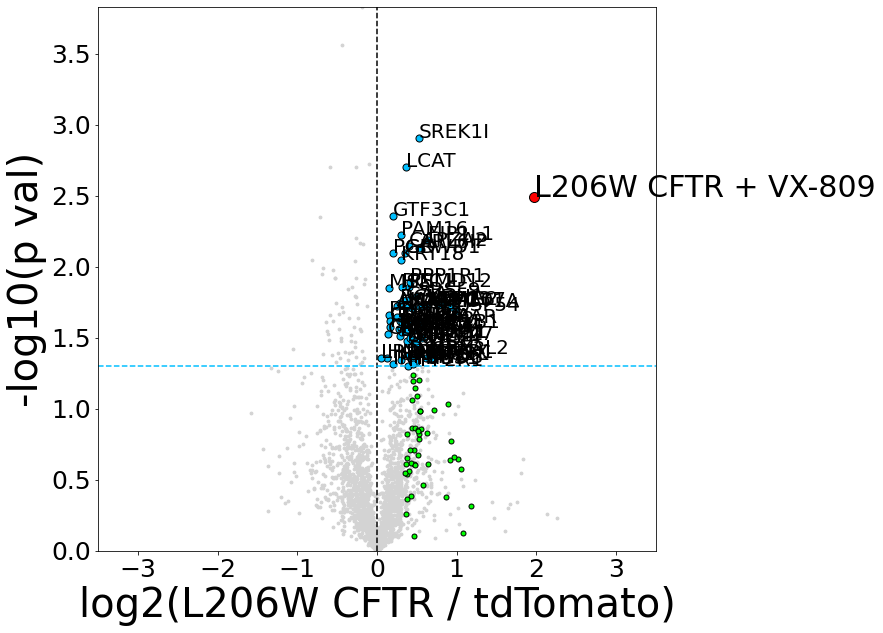

In [96]:
x = L206W_VX809_over_TD_2plot['avg']
y = L206W_VX809_over_TD_2plot['-log10 p_val']

cutoff = -np.log10(0.05)
rng = 3.5
fontsize = 40
plt.figure(figsize=(10,10))

plt.scatter(x,y, color = 'lightgrey', s=8)

plt.vlines((0), 0, max(y), ls='--' , color = 'k')
plt.hlines(cutoff, -rng, rng, ls='--' , color = 'deepskyblue')
plt.xlim(-rng,rng)
plt.ylim(0,max(y))
L206W_VX809_interactors =[]
for i in x.items(): 
    if y[i[0]] >= cutoff and x[i[0]] >0: #y[i[0]] >= c/(x[i[0]]-x_std) and x[i[0]] >= x_std: 
        plt.scatter(x[i[0]], y[i[0]], color = 'deepskyblue',edgecolor='k',s = 50)
        L206W_VX809_interactors.append(str(data2.iloc[i[0]]['Gene Name']))
        if data2.iloc[i[0]]['Gene Name'] == 'CFTR':
            plt.scatter(x[i[0]], y[i[0]], color = 'r', edgecolor='k', s=100)
            plt.text(x[i[0]],y[i[0]], 'L206W CFTR + VX-809', size=fontsize-10, color ='k')
        else: 
            plt.text(x[i[0]],y[i[0]], str(data2.iloc[i[0]]['Gene Name'])[:6], size=fontsize-20)
            #print("Sabusap: " + str(data2.iloc[i[0]]['Gene Name'])[:6])
    elif str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome and x[i[0]] > np.std(x):
        plt.scatter(x[i[0]], y[i[0]], color = 'lime',edgecolor='k',s =25)
        upregulted_former_interactors.append(str(data2.iloc[i[0]]['Gene Name']))
        #rint("Pankow and Hutt: " + str(data2.iloc[i[0]]['Gene Name'])[:6])

plt.xlabel('log2(L206W CFTR / tdTomato)', size=fontsize)
plt.xticks(size=fontsize-15)
plt.ylabel('-log10(p val)', size=fontsize)
plt.yticks(size=fontsize-15)
#plt.savefig('../Figures/L206W_CFTR_VX809_volcano_plot.svg', format='svg')

# G85E + DMSO

In [97]:
TD_tom = np.log2(data3[mock])

In [98]:
G85E_CFTR_DMSO = np.log2(data3[G85E_DMSO])

In [99]:
#drop the first G85E replicate in run 12 because CFTR did not show up as enriched on the western blot
G85E_CFTR_DMSO = G85E_CFTR_DMSO.drop(columns ='Run 12 G85E-DMSO')

In [100]:
G85E_DMSO_mocks = get_mock_runs(G85E_CFTR_DMSO, TD_tom,0)
G85E_DMSO_over_TD = pd.DataFrame(G85E_CFTR_DMSO.values - G85E_DMSO_mocks.values)

In [101]:
G85E_stat_vals_DMSO = stats.ttest_rel(G85E_CFTR_DMSO.values, G85E_DMSO_mocks.values, axis=1, nan_policy= 'omit')

In [102]:
# filter out any proteins which were not identified in at least 3 runs 
G85E_DMSO_over_TD_2plot = pd.DataFrame()
G85E_DMSO_over_TD_2plot['nans'] = G85E_DMSO_over_TD.isna().sum(axis=1)

drop_rows = []
for i,val in enumerate(G85E_DMSO_over_TD_2plot['nans']):
    if val > len(G85E_DMSO_over_TD.columns)-2:
        drop_rows.append(i)
        
G85E_DMSO_over_TD = G85E_DMSO_over_TD.drop(axis=0, index=drop_rows)
print('the number of interactors left = ' +str(len(G85E_DMSO_over_TD)))



the number of interactors left = 2409


In [103]:
G85E_DMSO_over_TD_2plot = pd.DataFrame()
G85E_DMSO_over_TD_2plot['avg'] = G85E_DMSO_over_TD.mean(axis=1)
G85E_DMSO_over_TD_2plot['med'] = G85E_DMSO_over_TD.median(axis=1)
G85E_DMSO_over_TD_2plot['std'] = G85E_DMSO_over_TD.std(axis=1)
G85E_DMSO_over_TD_2plot['pvals'] = np.delete(np.array(G85E_stat_vals_DMSO[1]), drop_rows)
G85E_DMSO_over_TD_2plot['-log10 p_val'] = -np.log10(G85E_DMSO_over_TD_2plot['pvals'])

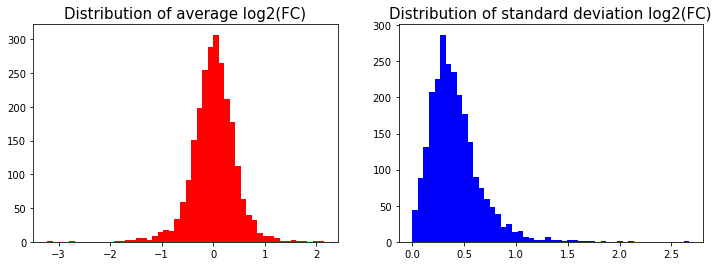

In [104]:
## plot the distribution of the average and stddev of the log fold changes
fig, ax = plt.subplots(1,2, figsize=(12,4))
bin_num =50
ax[0].hist(G85E_DMSO_over_TD_2plot['avg'], bins=bin_num, color='r')
ax[0].set_title('Distribution of average log2(FC)',fontsize=15)
ax[1].hist(G85E_DMSO_over_TD_2plot['std'], bins=bin_num, color ='b')
ax[1].set_title('Distribution of standard deviation log2(FC)',fontsize=15)
plt.show()

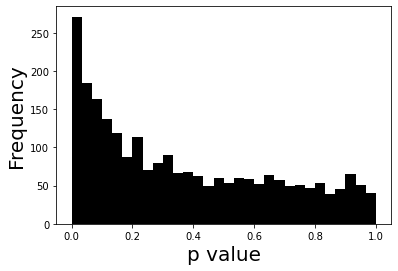

In [105]:
## plot a histogram of the p values 
plt.hist(G85E_DMSO_over_TD_2plot['pvals'], bins=30, color = 'k')
plt.xlabel('p value', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()

(array([0., 1., 2., 3., 4., 5.]), <a list of 6 Text major ticklabel objects>)

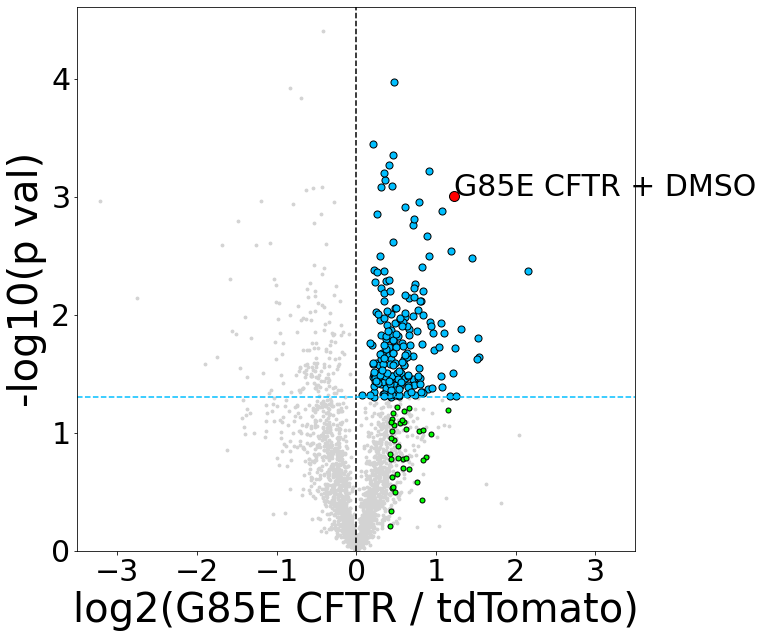

In [106]:
x = G85E_DMSO_over_TD_2plot['avg']
y = G85E_DMSO_over_TD_2plot['-log10 p_val']

cutoff = -np.log10(0.05)
rng = 3.5
fontsize = 40
plt.figure(figsize=(10,10))

plt.scatter(x,y, color = 'lightgrey', s=8)

plt.vlines((0), 0, max(y)+0.2, ls='--' , color = 'k')
plt.hlines(cutoff, -rng, rng, ls='--' , color = 'deepskyblue')
plt.xlim(-rng,rng)
plt.ylim(0,max(y)+0.2)
G85E_DMSO_interactors =[]
for i in x.items(): 
   
    if y[i[0]] >= cutoff and x[i[0]] >0: #y[i[0]] >= c/(x[i[0]]-x_std) and x[i[0]] >= x_std: 
        plt.scatter(x[i[0]], y[i[0]], color = 'deepskyblue',edgecolor='k',s = 50)
        G85E_DMSO_interactors.append(str(data2.iloc[i[0]]['Gene Name']))
        if data2.iloc[i[0]]['Gene Name'] == 'CFTR':
            plt.scatter(x[i[0]], y[i[0]], color = 'r', edgecolor='k', s=100)
            plt.text(x[i[0]],y[i[0]], 'G85E CFTR + DMSO', size=fontsize-10, color ='k')
        #else: 
         #   plt.text(x[i[0]],y[i[0]], str(data2.iloc[i[0]]['Gene Name'])[:6], size=fontsize-20)
            #print("Sabusap: " + str(data2.iloc[i[0]]['Gene Name'])[:6])
    elif str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome and x[i[0]] > np.std(x):
        plt.scatter(x[i[0]], y[i[0]], color = 'lime',edgecolor='k',s =25)
        upregulted_former_interactors.append(str(data2.iloc[i[0]]['Gene Name']))
        #rint("Pankow and Hutt: " + str(data2.iloc[i[0]]['Gene Name'])[:6])

plt.xlabel('log2(G85E CFTR / tdTomato)', size=fontsize)
plt.xticks(size=fontsize-10)
plt.ylabel('-log10(p val)', size=fontsize)
plt.yticks(size=fontsize-10)
#plt.savefig('../Figures/G85E_CFTR_DMSO_volcano_plot.svg', format='svg')

# G85E + VX-809

In [107]:
TD_tom = np.log2(data3[mock])

In [108]:
G85E_CFTR_VX809 = np.log2(data3[G85E_VX809])

In [109]:
#drop the first G85E replicate in run 12 because CFTR did not show up as enriched on the western blot
G85E_CFTR_VX809 = G85E_CFTR_VX809.drop(columns ='Run 12 G85E-VX809')

In [110]:
G85E_VX809_mocks = get_mock_runs(G85E_CFTR_VX809, TD_tom,0)
G85E_VX809_over_TD = pd.DataFrame(G85E_CFTR_VX809.values - G85E_VX809_mocks.values)

In [111]:
G85E_stat_vals_VX809 = stats.ttest_rel(G85E_CFTR_VX809.values, G85E_VX809_mocks.values, axis=1, nan_policy= 'omit')

In [112]:
# filter out any proteins which were not identified in at least 3 runs 
G85E_VX809_over_TD_2plot = pd.DataFrame()
G85E_VX809_over_TD_2plot['nans'] = G85E_VX809_over_TD.isna().sum(axis=1)

drop_rows = []
for i,val in enumerate(G85E_VX809_over_TD_2plot['nans']):
    if val > len(G85E_VX809_over_TD.columns)-2:
        drop_rows.append(i)
        
G85E_VX809_over_TD = G85E_VX809_over_TD.drop(axis=0, index=drop_rows)
print('the number of interactors left = ' +str(len(G85E_VX809_over_TD)))



the number of interactors left = 2409


In [113]:
G85E_VX809_over_TD_2plot = pd.DataFrame()
G85E_VX809_over_TD_2plot['avg'] = G85E_VX809_over_TD.mean(axis=1)
G85E_VX809_over_TD_2plot['med'] = G85E_VX809_over_TD.median(axis=1)
G85E_VX809_over_TD_2plot['std'] = G85E_VX809_over_TD.std(axis=1)
G85E_VX809_over_TD_2plot['pvals'] = np.delete(np.array(G85E_stat_vals_VX809[1]), drop_rows)
G85E_VX809_over_TD_2plot['-log10 p_val'] = -np.log10(G85E_VX809_over_TD_2plot['pvals'])

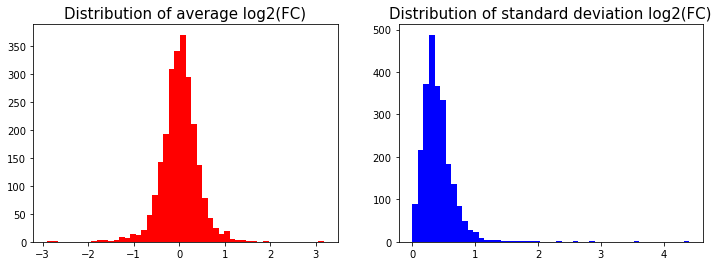

In [114]:
## plot the distribution of the average and stddev of the log fold changes
fig, ax = plt.subplots(1,2, figsize=(12,4))
bin_num =50
ax[0].hist(G85E_VX809_over_TD_2plot['avg'], bins=bin_num, color='r')
ax[0].set_title('Distribution of average log2(FC)',fontsize=15)
ax[1].hist(G85E_VX809_over_TD_2plot['std'], bins=bin_num, color ='b')
ax[1].set_title('Distribution of standard deviation log2(FC)',fontsize=15)
plt.show()

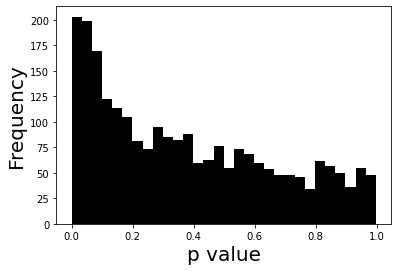

In [115]:
## plot a histogram of the p values 
plt.hist(G85E_VX809_over_TD_2plot['pvals'], bins=30, color = 'k')
plt.xlabel('p value', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()

(array([0., 1., 2., 3., 4., 5.]), <a list of 6 Text major ticklabel objects>)

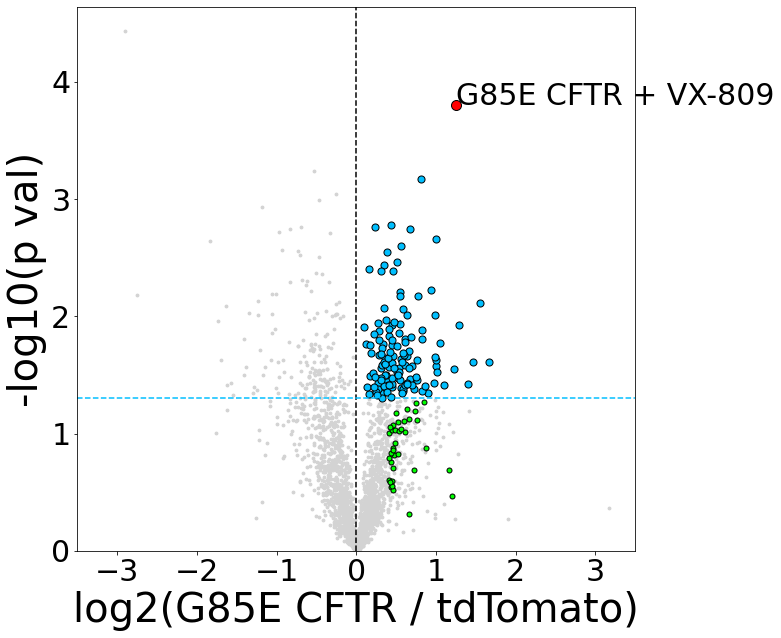

In [116]:
x = G85E_VX809_over_TD_2plot['avg']
y = G85E_VX809_over_TD_2plot['-log10 p_val']

cutoff = -np.log10(0.05)
rng = 3.5
fontsize = 40
plt.figure(figsize=(10,10))

plt.scatter(x,y, color = 'lightgrey', s=8)

plt.vlines((0), 0, max(y)+0.2, ls='--' , color = 'k')
plt.hlines(cutoff, -rng, rng, ls='--' , color = 'deepskyblue')
plt.xlim(-rng,rng)
plt.ylim(0,max(y)+0.2)
G85E_VX809_interactors =[]
for i in x.items(): 
    if y[i[0]] >= cutoff and x[i[0]] >0: #y[i[0]] >= c/(x[i[0]]-x_std) and x[i[0]] >= x_std: 
        plt.scatter(x[i[0]], y[i[0]], color = 'deepskyblue',edgecolor='k',s = 50)
        G85E_VX809_interactors.append(str(data2.iloc[i[0]]['Gene Name']))
        if data2.iloc[i[0]]['Gene Name'] == 'CFTR':
            plt.scatter(x[i[0]], y[i[0]], color = 'r', edgecolor='k', s=100)
            plt.text(x[i[0]],y[i[0]], 'G85E CFTR + VX-809', size=fontsize-10, color ='k')
        #else: 
         #   plt.text(x[i[0]],y[i[0]], str(data2.iloc[i[0]]['Gene Name'])[:6], size=fontsize-20)
            #print("Sabusap: " + str(data2.iloc[i[0]]['Gene Name'])[:6])
    elif str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome and x[i[0]] > np.std(x):
        plt.scatter(x[i[0]], y[i[0]], color = 'lime',edgecolor='k',s =25)
        upregulted_former_interactors.append(str(data2.iloc[i[0]]['Gene Name']))
        #rint("Pankow and Hutt: " + str(data2.iloc[i[0]]['Gene Name'])[:6])

plt.xlabel('log2(G85E CFTR / tdTomato)', size=fontsize)
plt.xticks(size=fontsize-10)
plt.ylabel('-log10(p val)', size=fontsize)
plt.yticks(size=fontsize-10)
#plt.savefig('../Figures/G85E_CFTR_VX809_volcano_plot.svg', format='svg')

In [117]:
Hutt_G85E = pd.read_excel('./Hutt_G85E_CFTR_interactome.xlsx', sheet_name='FC pval G85E vs GFP')


In [118]:
G85E_venn_dict = {}
G85E_venn_dict['Hutt'] = set(Hutt_G85E['Genenames'])
G85E_venn_dict['Sabusap'] = set(np.concatenate([G85E_DMSO_interactors,G85E_VX809_interactors ]))



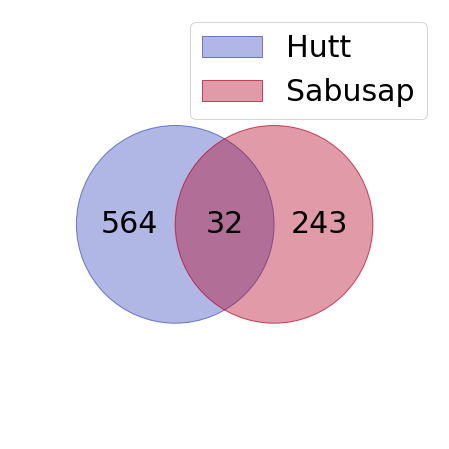

In [119]:
venn(G85E_venn_dict, cmap='coolwarm', fontsize=30)
#plt.savefig('../Figures/G85E_venn_diagram.svg', format='svg')

## Plot Interactors Overlap

In [120]:
Sabusap_core_interactome = np.concatenate(  [WT_DMSO_interactors, WT_VX809_interactors,
                                    F508del_DMSO_interactors, F508del_VX809_interactors,
                                    L206W_DMSO_interactors, L206W_VX809_interactors, 
                                    G85E_DMSO_interactors, G85E_VX809_interactors])

In [122]:
Hutt_G85E = pd.read_excel('./Hutt_G85E_CFTR_interactome.xlsx')

In [123]:
Hutt_core_interactome2 = np.concatenate([Hutt_core_interactome, np.array(Hutt_G85E['Proteins'])])

In [124]:
Pankow_core_interactome = Pankow_CFTR_core['Official Gene symbol']

In [125]:
core_venn_dict = {}
core_venn_dict['McDonald, Sabusap'] = set(Sabusap_core_interactome)
core_venn_dict['Pankow'] = set(Pankow_core_interactome)
core_venn_dict['Hutt'] = set(Hutt_core_interactome)

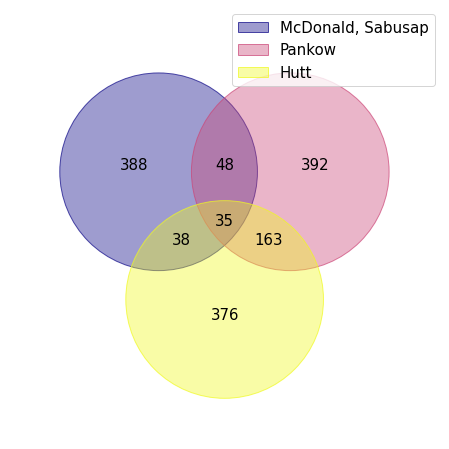

In [126]:
venn(core_venn_dict, cmap='plasma', fontsize=15)
#plt.savefig('../Figures/Sabusap_Pankow_Hutt_venn_diagram.svg', format='svg')

In [128]:
McDonald_core_interactome = set(Sabusap_core_interactome)

In [129]:
overlap = []
for i in McDonald_core_interactome:
    if i in list(Pankow_core_interactome) and i in Hutt_core_interactome:
        overlap.append(i)

## All variants + DMSO and VX-809

In [131]:
x = WT_DMSO_over_TD_2plot['avg']
y = WT_DMSO_over_TD_2plot['-log10 p_val']
x0 = WT_VX809_over_TD_2plot['avg']
y0 = WT_VX809_over_TD_2plot['pvals']

x1 = F508del_DMSO_over_TD_2plot['avg']
y1 = F508del_DMSO_over_TD_2plot['-log10 p_val']
x2 = F508del_VX809_over_TD_2plot['avg']
y2 = F508del_VX809_over_TD_2plot['-log10 p_val']

x3 = P67L_DMSO_over_TD_2plot['avg']
y3 = P67L_DMSO_over_TD_2plot['-log10 p_val']
x4 = P67L_VX809_over_TD_2plot['avg']
y4 = P67L_VX809_over_TD_2plot['-log10 p_val']

x5 = L206W_DMSO_over_TD_2plot['avg']
y5 = L206W_DMSO_over_TD_2plot['-log10 p_val']
x6 = L206W_VX809_over_TD_2plot['avg']
y6 = L206W_VX809_over_TD_2plot['-log10 p_val']

x7 = G85E_DMSO_over_TD_2plot['avg']
y7 = G85E_DMSO_over_TD_2plot['-log10 p_val']
x8 = G85E_VX809_over_TD_2plot['avg']
y8 = G85E_VX809_over_TD_2plot['-log10 p_val']

(array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 7 Text major ticklabel objects>)

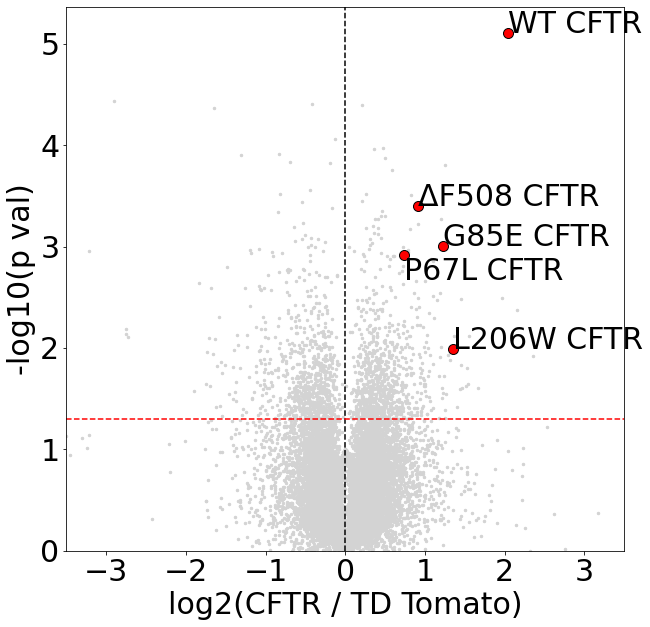

In [132]:
cutoff = -np.log10(0.05)
rng = 3.5
fontsize = 30
plt.figure(figsize=(10,10))

plt.scatter(x,  y,  color = 'lightgrey', s=6)
plt.scatter(x0, y0, color = 'lightgrey', s=6)
plt.scatter(x1, y1, color = 'lightgrey', s=6)
plt.scatter(x2, y2, color = 'lightgrey', s=6)
plt.scatter(x3, y3, color = 'lightgrey', s=6)
plt.scatter(x4, y4, color = 'lightgrey', s=6)
plt.scatter(x5, y5, color = 'lightgrey', s=6)
plt.scatter(x6, y6, color = 'lightgrey', s=6)
plt.scatter(x7, y7, color = 'lightgrey', s=6)
plt.scatter(x8, y8, color = 'lightgrey', s=6)

plt.vlines((0), 0, max(y)+0.25, ls='--' , color = 'k')
plt.hlines(cutoff, -rng, rng, ls='--' , color = 'red')
plt.xlim(-rng,rng)
plt.ylim(0,max(y)+0.25)

for i in x7.items(): 
    if y7[i[0]] >= cutoff and x7[i[0]] >0 and str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome:  
        #plt.scatter(x7[i[0]], y7[i[0]], color = 'coral',edgecolor='k',s = 50)
        if data2.iloc[i[0]]['Gene Name'] == 'CFTR':
            plt.scatter(x7[i[0]], y7[i[0]], color = 'r', edgecolor='k', s=100, zorder =1)
            plt.text(x7[i[0]],y7[i[0]], 'G85E CFTR', size=fontsize, color ='k', zorder =1)
   # elif y7[i[0]] >= cutoff and x7[i[0]] >0: 
    #    plt.scatter(x7[i[0]], y7[i[0]], color = 'deepskyblue',edgecolor='k',s = 50)
    #elif str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome and x7[i[0]] > np.std(x7):
     #   plt.scatter(x7[i[0]], y7[i[0]], color = 'lime',edgecolor='k',s =25)
'''  
for i in x8.items(): 
    if y8[i[0]] >= cutoff and x8[i[0]] >0 and str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome: 
        plt.scatter(x8[i[0]], y8[i[0]], color = 'coral',edgecolor='k',s = 50)
    elif y8[i[0]] >= cutoff and x8[i[0]] >0: 
        plt.scatter(x8[i[0]], y8[i[0]], color = 'deepskyblue',edgecolor='k',s = 50)
    elif str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome and x8[i[0]] > np.std(x8):
        plt.scatter(x8[i[0]], y8[i[0]], color = 'lime',edgecolor='k',s =25)
'''  
for i in x.items(): 
    if y[i[0]] >= cutoff and x[i[0]] >0 and str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome: 
        #plt.scatter(x[i[0]], y[i[0]], color = 'coral',edgecolor='k',s = 50)
        if data2.iloc[i[0]]['Gene Name'] == 'CFTR':
            plt.scatter(x[i[0]], y[i[0]], color = 'r', edgecolor='k', s=100)
            plt.text(x[i[0]],y[i[0]], 'WT CFTR', size=fontsize, color ='k')
    #elif y[i[0]] >= cutoff and x[i[0]] >0: 
     #   plt.scatter(x[i[0]], y[i[0]], color = 'deepskyblue',edgecolor='k',s = 50)
    #elif str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome and x[i[0]] > np.std(x):
     #   plt.scatter(x[i[0]], y[i[0]], color = 'lime',edgecolor='k',s =25)
'''    
for i in x0.items(): 
    if y0[i[0]] >= cutoff and x0[i[0]] >0 and str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome: 
        plt.scatter(x0[i[0]], y0[i[0]], color = 'coral',edgecolor='k',s = 50)
    elif y0[i[0]] >= cutoff and x0[i[0]] >0: 
        plt.scatter(x0[i[0]], y0[i[0]], color = 'deepskyblue',edgecolor='k',s = 50)
    elif str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome and x0[i[0]] > np.std(x0):
        plt.scatter(x0[i[0]], y0[i[0]], color = 'lime',edgecolor='k',s =25)
'''   
for i in x1.items(): 
    if y1[i[0]] >= cutoff and x1[i[0]] >0 and str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome: 
        #plt.scatter(x1[i[0]], y1[i[0]], color = 'coral',edgecolor='k',s = 50)
        if data2.iloc[i[0]]['Gene Name'] == 'CFTR':
            plt.scatter(x1[i[0]], y1[i[0]], color = 'r', edgecolor='k', s=100)
            plt.text(x1[i[0]],y1[i[0]], '\u0394F508 CFTR', size=fontsize, color ='k')
    #elif y1[i[0]] >= cutoff and x1[i[0]] >0: 
     #   plt.scatter(x1[i[0]], y1[i[0]], color = 'deepskyblue',edgecolor='k',s = 50)
    #elif str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome and x1[i[0]] > np.std(x1):
     #   plt.scatter(x1[i[0]], y1[i[0]], color = 'lime',edgecolor='k',s =25)
'''    
for i in x2.items(): 
    if y2[i[0]] >= cutoff and x2[i[0]] >0 and str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome: 
        plt.scatter(x2[i[0]], y2[i[0]], color = 'coral',edgecolor='k',s = 50)
    elif y2[i[0]] >= cutoff and x2[i[0]] >0: 
        plt.scatter(x2[i[0]], y2[i[0]], color = 'deepskyblue',edgecolor='k',s = 50)
    elif str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome and x2[i[0]] > np.std(x2):
        plt.scatter(x2[i[0]], y2[i[0]], color = 'lime',edgecolor='k',s =25)
'''     
for i in x3.items(): 
    if y3[i[0]] >= cutoff and x3[i[0]] >0 and str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome:  
        #plt.scatter(x3[i[0]], y3[i[0]], color = 'coral',edgecolor='k',s = 50)
        if data2.iloc[i[0]]['Gene Name'] == 'CFTR':
            plt.scatter(x3[i[0]], y3[i[0]], color = 'r', edgecolor='k', s=100, zorder =1)
            plt.text(x3[i[0]],y3[i[0]]-0.25, 'P67L CFTR', size=fontsize, color ='k', zorder =1)
    #elif y3[i[0]] >= cutoff and x3[i[0]] >0: 
     #   plt.scatter(x3[i[0]], y3[i[0]], color = 'deepskyblue',edgecolor='k',s = 50)
    #elif str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome and x3[i[0]] > np.std(x3):
     #   plt.scatter(x3[i[0]], y3[i[0]], color = 'lime',edgecolor='k',s =25)
''' 
for i in x4.items(): 
    if y4[i[0]] >= cutoff and x4[i[0]] >0 and str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome: 
        plt.scatter(x4[i[0]], y4[i[0]], color = 'coral',edgecolor='k',s = 50)
    elif y4[i[0]] >= cutoff and x4[i[0]] >0: 
        plt.scatter(x4[i[0]], y4[i[0]], color = 'deepskyblue',edgecolor='k',s = 50)
    elif str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome and x4[i[0]] > np.std(x4):
        plt.scatter(x4[i[0]], y4[i[0]], color = 'lime',edgecolor='k',s =25)
 '''         
        
for i in x5.items(): 
    if y5[i[0]] >= cutoff and x5[i[0]] >0 and str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome:  
        #plt.scatter(x5[i[0]], y5[i[0]], color = 'coral',edgecolor='k',s = 50)
        if data2.iloc[i[0]]['Gene Name'] == 'CFTR':
            plt.scatter(x5[i[0]], y5[i[0]], color = 'r', edgecolor='k', s=100)
            plt.text(x5[i[0]],y5[i[0]], 'L206W CFTR', size=fontsize, color ='k')
    #elif y5[i[0]] >= cutoff and x5[i[0]] >0: 
     #   plt.scatter(x5[i[0]], y5[i[0]], color = 'deepskyblue',edgecolor='k',s = 50)
    #elif str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome and x5[i[0]] > np.std(x5):
     #   plt.scatter(x5[i[0]], y5[i[0]], color = 'lime',edgecolor='k',s =25)
'''    
for i in x6.items(): 
    if y6[i[0]] >= cutoff and x6[i[0]] >0 and str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome: 
        plt.scatter(x6[i[0]], y6[i[0]], color = 'coral',edgecolor='k',s = 50)
    elif y6[i[0]] >= cutoff and x6[i[0]] >0: 
        plt.scatter(x6[i[0]], y6[i[0]], color = 'deepskyblue',edgecolor='k',s = 50)
    elif str(data2.iloc[i[0]]['Gene Name']) in Pankow_and_Hutt_core_interactome and x6[i[0]] > np.std(x6):
        plt.scatter(x6[i[0]], y6[i[0]], color = 'lime',edgecolor='k',s =25)
'''       


        
plt.xlabel('log2(CFTR / TD Tomato)', size=fontsize)
plt.ylabel('-log10(p val)', size=fontsize)
plt.xticks(size=fontsize)
plt.yticks(size=fontsize)
#plt.savefig('/Users/elimcdonald/Desktop/Volcano_plt1pnt5.png', format='png')


In [133]:
print('F508del + DMSO  = ' + str(len(F508del_DMSO_interactors)))
print('F508del + VX809 = ' + str(len(F508del_VX809_interactors)))
print('\n')
print('P67L + DMSO  = ' + str(len(P67L_DMSO_interactors)))
print('P67L + VX809 = ' + str(len(P67L_VX809_interactors)))
print('\n')
print('L206W + DMSO  = ' + str(len(L206W_DMSO_interactors)))
print('L206W+ VX809 = ' + str(len(L206W_VX809_interactors)))
print('\n')
print('G85E + DMSO  = ' + str(len(G85E_DMSO_interactors)))
print('G85E + VX809 = ' + str(len(G85E_VX809_interactors)))

F508del + DMSO  = 64
F508del + VX809 = 50


P67L + DMSO  = 86
P67L + VX809 = 104


L206W + DMSO  = 86
L206W+ VX809 = 66


G85E + DMSO  = 209
G85E + VX809 = 136


In [134]:
import scipy.stats as stats


In [135]:
data4 = data3.set_index('Gene Name')

In [136]:
data5 = pd.DataFrame()

In [138]:
CFTR_quant = [np.mean(data4.loc['CFTR'][mock]), 
              np.mean(data4.loc['CFTR'][WT_DMSO]), np.mean(data4.loc['CFTR'][WT_VX809]), 
              np.mean(data4.loc['CFTR'][P67L_DMSO]), np.mean(data4.loc['CFTR'][P67L_VX809]),
              np.mean(data4.loc['CFTR'][G85E_DMSO]), np.mean(data4.loc['CFTR'][G85E_VX809]),
              np.mean(data4.loc['CFTR'][L206W_DMSO]), np.mean(data4.loc['CFTR'][L206W_VX809]),
              np.mean(data4.loc['CFTR'][F508del_DMSO]), np.mean(data4.loc['CFTR'][F508del_VX809])]

CFTR_err = [stats.sem(data4.loc['CFTR'][mock]), 
            stats.sem(data4.loc['CFTR'][WT_DMSO]), 
            np.std(data4.loc['CFTR'][WT_DMSO])/np.sqrt(len(data4.loc['CFTR'][WT_DMSO])),
            np.std(data4.loc['CFTR'][WT_VX809])/np.sqrt(len(data4.loc['CFTR'][WT_VX809])), 
            stats.sem(data4.loc['CFTR'][P67L_DMSO]), 
            stats.sem(data4.loc['CFTR'][P67L_VX809]),
            stats.sem(data4.loc['CFTR'][G85E_DMSO]),
            stats.sem(data4.loc['CFTR'][G85E_VX809]),
            stats.sem(data4.loc['CFTR'][L206W_DMSO]),
            stats.sem(data4.loc['CFTR'][L206W_VX809]),
            stats.sem(data4.loc['CFTR'][F508del_DMSO]),
            stats.sem(data4.loc['CFTR'][F508del_VX809])]


CFTR_quant_norm = np.array(CFTR_quant)/np.mean(data4.loc['CFTR'][WT_DMSO])

In [140]:
CFTR_quant_norm = [0.277485447, 1, 1.135707386, 0.497784846, 0.694093143, 0.443528202, 0.440923087, 0.594991105, 0.951578489, 0.54834836, 0.665263631]
CFTR_err_norm = [0.059090548, 0, 0.18254973, 0.060986982, 0.086215159, 0.087071498, 0.067750077, 0.155500904, 0.294701813, 0.067761054, 0.09034391]


Text(0, 0.5, 'Band Quantification (normalized to WT DMSO)')

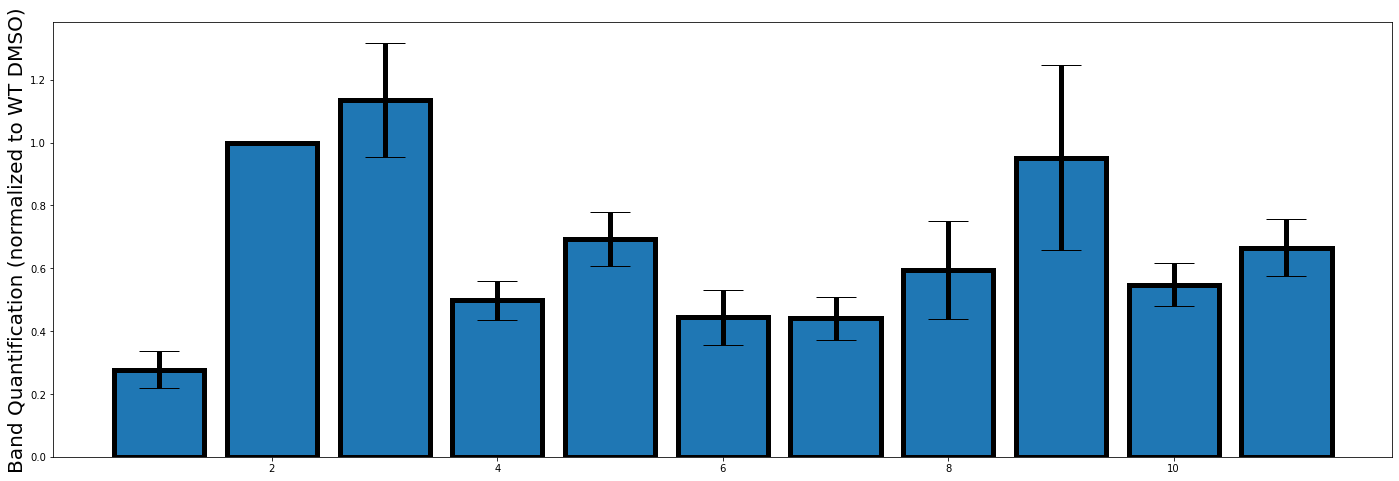

In [142]:
plt.figure(figsize=(24,8))
plt.bar([1,2,3,4,5,6,7,8,9,10,11], height=CFTR_quant_norm, edgecolor='k', lw=5) 
plt.errorbar([1,2,3,4,5,6,7,8,9,10,11], CFTR_quant_norm, yerr=CFTR_err_norm, ecolor='k', capsize=20, lw=5, ls='none')
plt.ylabel('Band Quantification (normalized to WT DMSO)', size=20)

#plt.savefig('../Figures/WesternBlots-Figure1/TMT_CFTR_quant_2.svg', format='svg')

In [143]:
CFTR_blot_quant = [0.011190325, 1, 0.751553492, 0.049130361, 0.432594699, 0.042418469, 0.038443716, 0.107729901, 0.624689517, 0.117941648, 0.189757744]

Text(0, 0.5, 'Band Quantification (normalized to WT DMSO)')

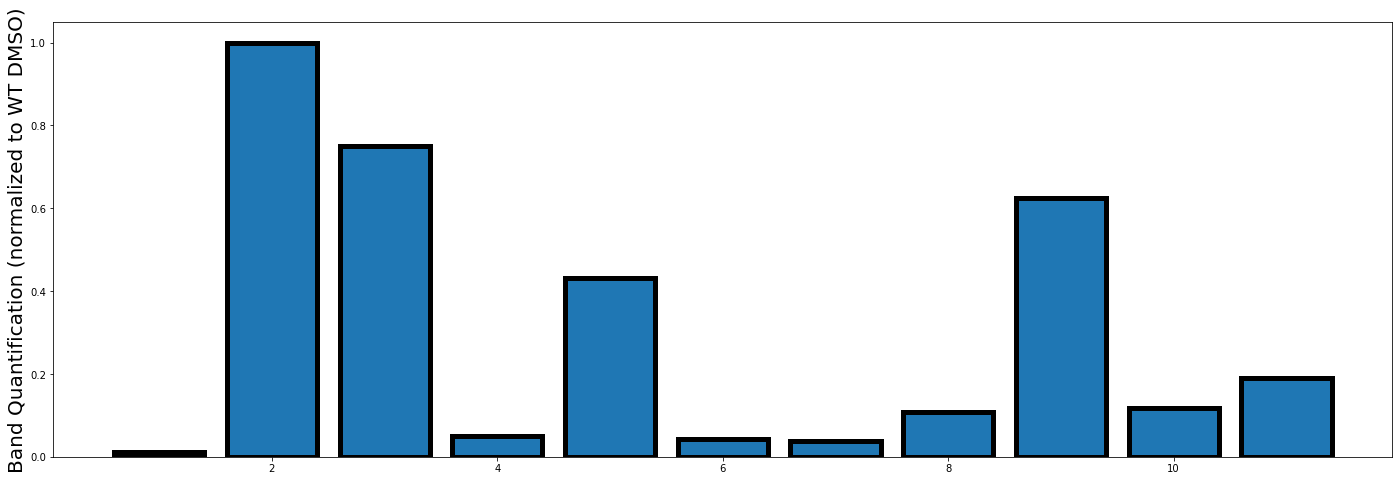

In [144]:
plt.figure(figsize=(24,8))
plt.bar([1,2,3,4,5,6,7,8,9,10,11], height=CFTR_blot_quant, edgecolor='k', lw=5) 
plt.ylabel('Band Quantification (normalized to WT DMSO)', size=20)
#plt.savefig('../Figures/WesternBlots-Figure1/Blot_CFTR_quant_2.svg', format='svg')

# Heatmaps

In [145]:
import seaborn as sns

In [146]:
data4 = data3.set_index('Gene Name')

In [147]:
## noramlize to CFTR levels in each run 
WT_DMSO_CFTRnorm = np.log2(data3[WT_DMSO]) -np.log2(data4.loc['CFTR'][WT_DMSO], dtype=float)

WT_DMSO_mock = get_mock_runs(WT_DMSO_CFTRnorm, WT_DMSO_CFTRnorm,0)

WT_DMSO_over_WT_DMSO = pd.DataFrame(WT_DMSO_CFTRnorm.values - WT_DMSO_mock.values)
## filter out any proteins which were not identified in at least 3 runs 
WT_DMSO_over_WT_DMSO.index = data3.index

drop_rows = []

for i,val in WT_DMSO_over_WT_DMSO.iterrows():
    if val.isna().sum() >  len(WT_DMSO_over_WT_DMSO.columns)-2:
        drop_rows.append(i)
        
WT_DMSO_over_WT_DMSO = WT_DMSO_over_WT_DMSO.drop(axis=0, index=drop_rows)
print('the number of interactors left = ' +str(len(WT_DMSO_over_WT_DMSO)))


WT_DMSO_over_WT_DMSO_2plot = pd.DataFrame()
WT_DMSO_over_WT_DMSO_2plot['avg'] = WT_DMSO_over_WT_DMSO.mean(axis=1)
WT_DMSO_over_WT_DMSO_2plot['med'] = WT_DMSO_over_WT_DMSO.median(axis=1)
WT_DMSO_over_WT_DMSO_2plot['std'] = WT_DMSO_over_WT_DMSO.std(axis=1)

the number of interactors left = 2302


In [148]:
## noramlize to CFTR levels in each run 
WT_VX809_CFTRnorm = np.log2(data3[WT_VX809]) -np.log2(data4.loc['CFTR'][WT_VX809], dtype=float)

WT_VX809_mock = get_mock_runs(WT_VX809_CFTRnorm, WT_DMSO_CFTRnorm,0)

WT_VX809_over_WT_DMSO = pd.DataFrame(WT_VX809_CFTRnorm.values - WT_VX809_mock.values)

## filter out any proteins which were not identified in at least 3 runs 
WT_VX809_over_WT_DMSO.index = data3.index

drop_rows = []

for i,val in WT_VX809_over_WT_DMSO.iterrows():
    if val.isna().sum() >  len(WT_VX809_over_WT_DMSO.columns)-2:
        drop_rows.append(i)
        
WT_VX809_over_WT_DMSO = WT_VX809_over_WT_DMSO.drop(axis=0, index=drop_rows)
print('the number of interactors left = ' +str(len(WT_VX809_over_WT_DMSO)))


WT_VX809_over_WT_DMSO_2plot = pd.DataFrame()
WT_VX809_over_WT_DMSO_2plot['avg'] = WT_VX809_over_WT_DMSO.mean(axis=1)
WT_VX809_over_WT_DMSO_2plot['med'] = WT_VX809_over_WT_DMSO.median(axis=1)
WT_VX809_over_WT_DMSO_2plot['std'] = WT_VX809_over_WT_DMSO.std(axis=1)

the number of interactors left = 1665


In [149]:
## noramlize to CFTR levels in each run 
F508del_DMSO_CFTRnorm = np.log2(data3[F508del_DMSO]) -np.log2(data4.loc['CFTR'][F508del_DMSO], dtype=float)
F508del_DMSO_mock = get_mock_runs(F508del_DMSO_CFTRnorm, WT_DMSO_CFTRnorm,0)

F508del_DMSO_over_WT_DMSO = pd.DataFrame(F508del_DMSO_CFTRnorm.values - F508del_DMSO_mock.values)

## filter out any proteins which were not identified in at least 3 runs 
F508del_DMSO_over_WT_DMSO.index = data3.index

drop_rows = []

for i,val in F508del_DMSO_over_WT_DMSO.iterrows():
    if val.isna().sum() >  len(F508del_DMSO_over_WT_DMSO.columns)-2:
        drop_rows.append(i)
        
F508del_DMSO_over_WT_DMSO = F508del_DMSO_over_WT_DMSO.drop(axis=0, index=drop_rows)
print('the number of interactors left = ' +str(len(F508del_DMSO_over_WT_DMSO)))

F508del_DMSO_over_WT_DMSO_2plot = pd.DataFrame()
F508del_DMSO_over_WT_DMSO_2plot['avg'] = F508del_DMSO_over_WT_DMSO.mean(axis=1)
F508del_DMSO_over_WT_DMSO_2plot['med'] = F508del_DMSO_over_WT_DMSO.median(axis=1)
F508del_DMSO_over_WT_DMSO_2plot['std'] = F508del_DMSO_over_WT_DMSO.std(axis=1)

the number of interactors left = 1487


In [150]:
F508del_VX809_CFTRnorm = np.log2(data3[F508del_VX809]) -np.log2(data4.loc['CFTR'][F508del_VX809], dtype=float)
F508del_VX809_mock = get_mock_runs(F508del_VX809_CFTRnorm, WT_DMSO_CFTRnorm,0)

F508del_VX809_over_WT_DMSO = pd.DataFrame(F508del_VX809_CFTRnorm.values - F508del_VX809_mock.values)

## filter out any proteins which were not identified in at least 3 runs 
F508del_VX809_over_WT_DMSO_2plot = pd.DataFrame()
F508del_VX809_over_WT_DMSO_2plot['nans'] = F508del_VX809_over_WT_DMSO.isna().sum(axis=1)

drop_rows = []
for i,val in enumerate(F508del_VX809_over_WT_DMSO_2plot['nans']):
    if val > len(F508del_VX809_over_WT_DMSO.columns)-2:
        drop_rows.append(i)
        
F508del_VX809_over_WT_DMSO = F508del_VX809_over_WT_DMSO.drop(axis=0, index=drop_rows)
print('the number of interactors left = ' +str(len(F508del_VX809_over_WT_DMSO)))

F508del_VX809_over_WT_DMSO_2plot = pd.DataFrame()
F508del_VX809_over_WT_DMSO_2plot['avg'] = F508del_VX809_over_WT_DMSO.mean(axis=1)
F508del_VX809_over_WT_DMSO_2plot['med'] = F508del_VX809_over_WT_DMSO.median(axis=1)
F508del_VX809_over_WT_DMSO_2plot['std'] = F508del_VX809_over_WT_DMSO.std(axis=1)

the number of interactors left = 1486


In [151]:
## noramlize to CFTR levels in each run 
P67L_DMSO_CFTRnorm = np.log2(data3[P67L_DMSO]) -np.log2(data4.loc['CFTR'][P67L_DMSO], dtype=float)
P67L_DMSO_mock = get_mock_runs(P67L_DMSO_CFTRnorm, WT_DMSO_CFTRnorm,0)

P67L_DMSO_over_WT_DMSO = pd.DataFrame(P67L_DMSO_CFTRnorm.values - P67L_DMSO_mock.values)

## filter out any proteins which were not identified in at least 3 runs 
P67L_DMSO_over_WT_DMSO.index = data3.index

drop_rows = []

for i,val in P67L_DMSO_over_WT_DMSO.iterrows():
    if val.isna().sum() >  len(P67L_DMSO_over_WT_DMSO.columns)-2:
        drop_rows.append(i)
        
P67L_DMSO_over_WT_DMSO = P67L_DMSO_over_WT_DMSO.drop(axis=0, index=drop_rows)
print('the number of interactors left = ' +str(len(P67L_DMSO_over_WT_DMSO)))


P67L_DMSO_over_WT_DMSO_2plot = pd.DataFrame()
P67L_DMSO_over_WT_DMSO_2plot['avg'] = P67L_DMSO_over_WT_DMSO.mean(axis=1)
P67L_DMSO_over_WT_DMSO_2plot['med'] = P67L_DMSO_over_WT_DMSO.median(axis=1)
P67L_DMSO_over_WT_DMSO_2plot['std'] = P67L_DMSO_over_WT_DMSO.std(axis=1)

the number of interactors left = 1778


In [152]:
P67L_VX809_CFTRnorm = np.log2(data3[P67L_VX809]) -np.log2(data4.loc['CFTR'][P67L_VX809], dtype=float)
P67L_VX809_mock = get_mock_runs(P67L_VX809_CFTRnorm, WT_DMSO_CFTRnorm,0)

P67L_VX809_over_WT_DMSO = pd.DataFrame(P67L_VX809_CFTRnorm.values - P67L_VX809_mock.values)

## filter out any proteins which were not identified in at least 3 runs 
P67L_VX809_over_WT_DMSO.index = data3.index

drop_rows = []

for i,val in P67L_VX809_over_WT_DMSO.iterrows():
    if val.isna().sum() >  len(P67L_VX809_over_WT_DMSO.columns)-2:
        drop_rows.append(i)
        
P67L_VX809_over_WT_DMSO = P67L_VX809_over_WT_DMSO.drop(axis=0, index=drop_rows)
print('the number of interactors left = ' +str(len(P67L_VX809_over_WT_DMSO)))


P67L_VX809_over_WT_DMSO_2plot = pd.DataFrame()
P67L_VX809_over_WT_DMSO_2plot['avg'] = P67L_VX809_over_WT_DMSO.mean(axis=1)
P67L_VX809_over_WT_DMSO_2plot['med'] = P67L_VX809_over_WT_DMSO.median(axis=1)
P67L_VX809_over_WT_DMSO_2plot['std'] = P67L_VX809_over_WT_DMSO.std(axis=1)

the number of interactors left = 1778


In [153]:
## noramlize to CFTR levels in each run 
L206W_DMSO_CFTRnorm = np.log2(data3[L206W_DMSO]) -np.log2(data4.loc['CFTR'][L206W_DMSO], dtype=float)
L206W_DMSO_mock = get_mock_runs(L206W_DMSO_CFTRnorm, WT_DMSO_CFTRnorm,0)

L206W_DMSO_over_WT_DMSO = pd.DataFrame(L206W_DMSO_CFTRnorm.values - L206W_DMSO_mock.values)

# filter out any proteins which were not identified in at least 3 runs 
L206W_DMSO_over_WT_DMSO.index = data3.index

drop_rows = []

for i,val in L206W_DMSO_over_WT_DMSO.iterrows():
    if val.isna().sum() >  len(L206W_DMSO_over_WT_DMSO.columns)-2:
        drop_rows.append(i)
        
L206W_DMSO_over_WT_DMSO = L206W_DMSO_over_WT_DMSO.drop(axis=0, index=drop_rows)
print('the number of interactors left = ' +str(len(L206W_DMSO_over_WT_DMSO)))

L206W_DMSO_over_WT_DMSO_2plot = pd.DataFrame()
L206W_DMSO_over_WT_DMSO_2plot['avg'] = L206W_DMSO_over_WT_DMSO.mean(axis=1)
L206W_DMSO_over_WT_DMSO_2plot['med'] = L206W_DMSO_over_WT_DMSO.median(axis=1)
L206W_DMSO_over_WT_DMSO_2plot['std'] = L206W_DMSO_over_WT_DMSO.std(axis=1)

the number of interactors left = 2353


In [154]:
L206W_VX809_CFTRnorm = np.log2(data3[L206W_VX809]) -np.log2(data4.loc['CFTR'][L206W_VX809], dtype=float)
L206W_VX809_mock = get_mock_runs(L206W_VX809_CFTRnorm, WT_DMSO_CFTRnorm,0)

L206W_VX809_over_WT_DMSO = pd.DataFrame(L206W_VX809_CFTRnorm.values - L206W_VX809_mock.values)

## filter out any proteins which were not identified in at least 3 runs 
L206W_VX809_over_WT_DMSO.index = data3.index

drop_rows = []

for i,val in L206W_VX809_over_WT_DMSO.iterrows():
    if val.isna().sum() >  len(L206W_VX809_over_WT_DMSO.columns)-2:
        drop_rows.append(i)
        
L206W_VX809_over_WT_DMSO = L206W_VX809_over_WT_DMSO.drop(axis=0, index=drop_rows)
print('the number of interactors left = ' +str(len(L206W_VX809_over_WT_DMSO)))



L206W_VX809_over_WT_DMSO_2plot = pd.DataFrame()
L206W_VX809_over_WT_DMSO_2plot['avg'] = L206W_VX809_over_WT_DMSO.mean(axis=1)
L206W_VX809_over_WT_DMSO_2plot['med'] = L206W_VX809_over_WT_DMSO.median(axis=1)
L206W_VX809_over_WT_DMSO_2plot['std'] = L206W_VX809_over_WT_DMSO.std(axis=1)

the number of interactors left = 2357


In [155]:
## noramlize to CFTR levels in each run 
G85E_DMSO_CFTRnorm = np.log2(data3[G85E_DMSO]) -np.log2(data4.loc['CFTR'][G85E_DMSO], dtype=float)
G85E_DMSO_mock = get_mock_runs(G85E_DMSO_CFTRnorm, WT_DMSO_CFTRnorm,0)

G85E_DMSO_over_WT_DMSO = pd.DataFrame(G85E_DMSO_CFTRnorm.values - G85E_DMSO_mock.values)

# filter out any proteins which were not identified in at least 3 runs 
G85E_DMSO_over_WT_DMSO.index = data3.index

drop_rows = []

for i,val in G85E_DMSO_over_WT_DMSO.iterrows():
    if val.isna().sum() >  len(G85E_DMSO_over_WT_DMSO.columns)-2:
        drop_rows.append(i)
        
G85E_DMSO_over_WT_DMSO = G85E_DMSO_over_WT_DMSO.drop(axis=0, index=drop_rows)
print('the number of interactors left = ' +str(len(G85E_DMSO_over_WT_DMSO)))

G85E_DMSO_over_WT_DMSO_2plot = pd.DataFrame()
G85E_DMSO_over_WT_DMSO_2plot['avg'] = G85E_DMSO_over_WT_DMSO.mean(axis=1)
G85E_DMSO_over_WT_DMSO_2plot['med'] = G85E_DMSO_over_WT_DMSO.median(axis=1)
G85E_DMSO_over_WT_DMSO_2plot['std'] = G85E_DMSO_over_WT_DMSO.std(axis=1)

the number of interactors left = 2624


In [156]:
G85E_VX809_CFTRnorm = np.log2(data3[G85E_VX809]) -np.log2(data4.loc['CFTR'][G85E_VX809], dtype=float)
G85E_VX809_mock = get_mock_runs(G85E_VX809_CFTRnorm, WT_DMSO_CFTRnorm,0)

G85E_VX809_over_WT_DMSO = pd.DataFrame(G85E_VX809_CFTRnorm.values - G85E_VX809_mock.values)


# filter out any proteins which were not identified in at least 3 runs 
G85E_VX809_over_WT_DMSO.index = data3.index

drop_rows = []

for i,val in G85E_VX809_over_WT_DMSO.iterrows():
    if val.isna().sum() >  len(G85E_VX809_over_WT_DMSO.columns)-2:
        drop_rows.append(i)
        
G85E_VX809_over_WT_DMSO = G85E_VX809_over_WT_DMSO.drop(axis=0, index=drop_rows)
print('the number of interactors left = ' +str(len(G85E_VX809_over_WT_DMSO)))

G85E_VX809_over_WT_DMSO_2plot = pd.DataFrame()
G85E_VX809_over_WT_DMSO_2plot['avg'] = G85E_VX809_over_WT_DMSO.mean(axis=1)
G85E_VX809_over_WT_DMSO_2plot['med'] = G85E_VX809_over_WT_DMSO.median(axis=1)
G85E_VX809_over_WT_DMSO_2plot['std'] = G85E_VX809_over_WT_DMSO.std(axis=1)

the number of interactors left = 2624


In [157]:
prioritized_list = np.concatenate(  [WT_DMSO_interactors, WT_VX809_interactors,
                                    F508del_DMSO_interactors, F508del_VX809_interactors,
                                    L206W_DMSO_interactors, L206W_VX809_interactors,
                                    G85E_DMSO_interactors, G85E_VX809_interactors,
                                    upregulted_former_interactors])

In [158]:
prioritized_list = set(prioritized_list)

In [159]:
to_heatmap =pd.DataFrame()
to_heatmap['prot'] = data3['Gene Name']
to_heatmap['WT DMSO'] = WT_DMSO_over_WT_DMSO_2plot['avg']
to_heatmap['WT VX809'] = WT_VX809_over_WT_DMSO_2plot['avg']
to_heatmap['F508del DMSO'] = F508del_DMSO_over_WT_DMSO_2plot['avg']
to_heatmap['F508del VX809'] = F508del_VX809_over_WT_DMSO_2plot['avg']
to_heatmap['P67L DMSO'] = P67L_DMSO_over_WT_DMSO_2plot['avg']
to_heatmap['P67L VX809'] = P67L_VX809_over_WT_DMSO_2plot['avg']
to_heatmap['L206W DMSO'] = L206W_DMSO_over_WT_DMSO_2plot['avg']
to_heatmap['L206W VX809'] = L206W_VX809_over_WT_DMSO_2plot['avg']
to_heatmap['G85E DMSO'] = G85E_DMSO_over_WT_DMSO_2plot['avg']
to_heatmap['G85E VX809'] = G85E_VX809_over_WT_DMSO_2plot['avg']

to_heatmap['WT DMSO std'] = WT_DMSO_over_WT_DMSO_2plot['std']
to_heatmap['WT VX809 std'] = WT_VX809_over_WT_DMSO_2plot['std']
to_heatmap['F508del DMSO std'] = F508del_DMSO_over_WT_DMSO_2plot['std']
to_heatmap['F508del VX809 std'] = F508del_VX809_over_WT_DMSO_2plot['std']
to_heatmap['P67L DMSO std'] = P67L_DMSO_over_WT_DMSO_2plot['std']
to_heatmap['P67L VX809 std'] = P67L_VX809_over_WT_DMSO_2plot['std']
to_heatmap['L206W DMSO std'] = L206W_DMSO_over_WT_DMSO_2plot['std']
to_heatmap['L206W VX809 std'] = L206W_VX809_over_WT_DMSO_2plot['std']
to_heatmap['G85E DMSO std'] = G85E_DMSO_over_WT_DMSO_2plot['std']
to_heatmap['G85E VX809 std'] = G85E_VX809_over_WT_DMSO_2plot['std']


In [160]:
not_in_list_ind = []
for i, val in enumerate(data3['Gene Name']):
    if val not in prioritized_list:
        not_in_list_ind.append(i)

In [161]:
to_heatmap = to_heatmap.drop(axis=0, index=not_in_list_ind)

In [162]:
to_heatmap = to_heatmap.set_index('prot')

In [164]:
annotated_pathways = pd.read_excel('./heatmap_pathways6.xlsx')
annotated_pathways = annotated_pathways.set_index('prot')

In [165]:
paths = []
for i in to_heatmap.index:
    paths.append(annotated_pathways.loc[i]['pathway'])
   
to_heatmap['pathway'] = np.array(paths)

In [166]:
to_heatmap.sort_values('pathway',inplace=True, ascending=True)

In [167]:
drop_rows = []
for i,val in to_heatmap.iterrows():
    if val.isna().sum() >  0:
        drop_rows.append(i)
        
to_heatmap = to_heatmap.drop(axis=0, index=drop_rows)
        

In [168]:
paths_of_interest = ['Translation', 'Endocytosis', 'Membrane Organization', 'Degradation', 'Proteasomal', 'Folding',
                     'Trafficking', 'Translocation', 'Translation','Autophagy']
prot_paths = []
for i in to_heatmap['pathway'].items():
    if i[1] in paths_of_interest:
        prot_paths.append(i[0])
        
to_heatmap_paths = to_heatmap.loc[prot_paths]

In [169]:
#to_heatmap_paths.to_excel('../Supplemental_Materials/Heatmap_Quantifications.xlsx')

In [170]:
to_heatmap_paths = to_heatmap

In [171]:
len(to_heatmap_paths.index)

338

In [172]:
to_heatmap_ordered = to_heatmap_paths.drop('pathway', axis=1)

In [173]:
to_heatmap_toplot=to_heatmap_ordered#.drop(['F508del DMSO', 'F508del VX809', 'P67L DMSO', 'P67L VX809', 'L206W DMSO', 'L206W VX809', 'G85E DMSO', 'G85E VX809'], axis=1)


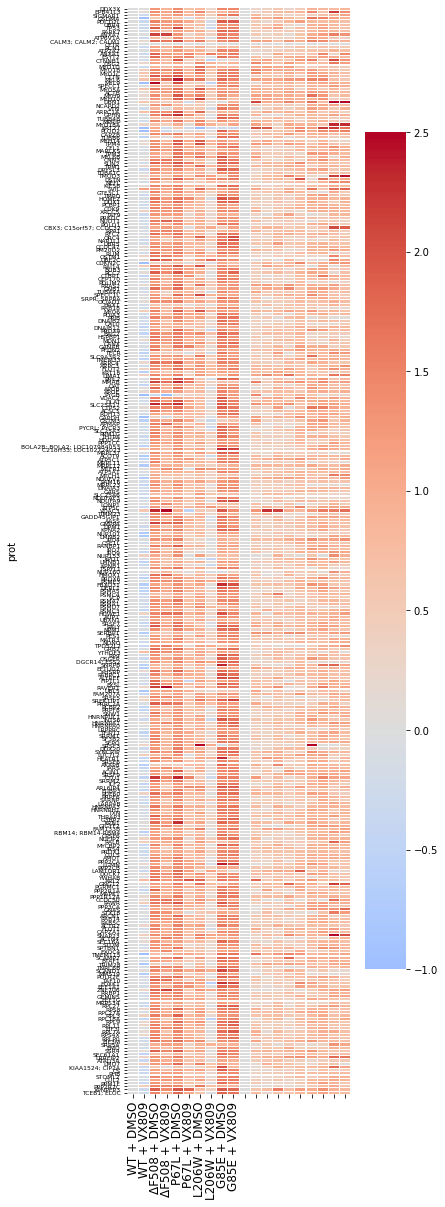

In [174]:
#diverging_colors = sns.color_palette("viridis", 10)
sns.diverging_palette(10, 10, as_cmap=True)

fig = plt.figure(figsize=(5,20))
ax=sns.heatmap(to_heatmap_toplot , vmin=-1, vmax=2.5,xticklabels=1,center=0, yticklabels=1, cbar=True,linewidths=.05, annot=False, cmap='coolwarm')
#ax.set_xticklabels(labels= ['WT + DMSO', '\u0394F508 + DMSO','\u0394F508 + VX809'],rotation=90, fontsize=12)
ax.set_xticklabels(labels= ['WT + DMSO', 'WT + VX809','\u0394F508 + DMSO','\u0394F508 + VX809', 'P67L + DMSO','P67L + VX809','L206W + DMSO', 'L206W + VX809', 'G85E + DMSO', 'G85E + VX809'],rotation=90, fontsize=12)
#ax.set_xticklabels(labels= ['WT + DMSO', 'WT + VX-809', '\u0394F508 DMSO','\u0394F508 VX809', 'P67L + DMSO','P67L + VX809'], rotation=90, fontsize=20)

ax.set_yticklabels(labels=to_heatmap_toplot.index, fontsize=6)

#plt.savefig('../Figures/heatmap_all_paths_supp_fig.svg', fmt='svg')
plt.show()

# Correlation Plots

In [160]:
prioritized_list = set(prioritized_list)

In [597]:
cp_df = pd.DataFrame()

cp_df['WT DMSO'] = WT_DMSO_over_TD_2plot['avg']
cp_df['WT DMSO err'] = WT_DMSO_over_TD_2plot['std']/np.sqrt(len(WT_DMSO_over_TD.columns))

cp_df['WT VX809'] = WT_VX809_over_TD_2plot['avg']
cp_df['WT VX809 err'] = WT_VX809_over_TD_2plot['std']/np.sqrt(len(WT_VX809_over_TD.columns))

cp_df['F508del DMSO'] = F508del_DMSO_over_TD_2plot['avg']
cp_df['F508del DMSO err'] = F508del_DMSO_over_TD_2plot['std']/np.sqrt(len(F508del_DMSO_over_TD.columns))

cp_df['F508del VX809'] = F508del_VX809_over_TD_2plot['avg']
cp_df['F508del VX809 err'] = F508del_VX809_over_TD_2plot['std']/np.sqrt(len(F508del_VX809_over_TD.columns))

cp_df['P67L DMSO'] = P67L_DMSO_over_TD_2plot['avg']
cp_df['P67L DMSO err'] = P67L_DMSO_over_TD_2plot['std']/np.sqrt(len(P67L_DMSO_over_TD.columns))

cp_df['P67L VX809'] = P67L_VX809_over_TD_2plot['avg']
cp_df['P67L VX809 err'] = P67L_VX809_over_TD_2plot['std']/np.sqrt(len(P67L_VX809_over_TD.columns))

cp_df['L206W DMSO'] = L206W_DMSO_over_TD_2plot['avg']
cp_df['L206W DMSO err'] = L206W_DMSO_over_TD_2plot['std']/np.sqrt(len(L206W_DMSO_over_TD.columns))

cp_df['L206W VX809'] = L206W_VX809_over_TD_2plot['avg']
cp_df['L206W VX809 err'] = L206W_VX809_over_TD_2plot['std']/np.sqrt(len(L206W_VX809_over_TD.columns))

cp_df['G85E DMSO'] = G85E_DMSO_over_TD_2plot['avg']
cp_df['G85E DMSO err'] = G85E_DMSO_over_TD_2plot['std']/np.sqrt(len(G85E_DMSO_over_TD.columns))

cp_df['G85E VX809'] = G85E_VX809_over_TD_2plot['avg']
cp_df['G85E VX809 err'] = G85E_VX809_over_TD_2plot['std']/np.sqrt(len(G85E_VX809_over_TD.columns))



In [574]:
cp_df = pd.DataFrame()

cp_df['WT DMSO'] = WT_DMSO_over_WT_DMSO_2plot['avg']
cp_df['WT DMSO err'] = WT_DMSO_over_WT_DMSO_2plot['std']/np.sqrt(len(WT_DMSO_over_TD.columns))

cp_df['WT VX809'] = WT_VX809_over_WT_DMSO_2plot['avg']
cp_df['WT VX809 err'] = WT_VX809_over_WT_DMSO_2plot['std']/np.sqrt(len(WT_VX809_over_TD.columns))

cp_df['F508del DMSO'] = F508del_DMSO_over_WT_DMSO_2plot['avg']
cp_df['F508del DMSO err'] = F508del_DMSO_over_WT_DMSO_2plot['std']/np.sqrt(len(F508del_DMSO_over_TD.columns))

cp_df['F508del VX809'] = F508del_VX809_over_WT_DMSO_2plot['avg']
cp_df['F508del VX809 err'] = F508del_VX809_over_WT_DMSO_2plot['std']/np.sqrt(len(F508del_VX809_over_TD.columns))

cp_df['P67L DMSO'] = P67L_DMSO_over_WT_DMSO_2plot['avg']
cp_df['P67L DMSO err'] = P67L_DMSO_over_WT_DMSO_2plot['std']/np.sqrt(len(P67L_DMSO_over_TD.columns))

cp_df['P67L VX809'] = P67L_VX809_over_WT_DMSO_2plot['avg']
cp_df['P67L VX809 err'] = P67L_VX809_over_WT_DMSO_2plot['std']/np.sqrt(len(P67L_VX809_over_TD.columns))

cp_df['L206W DMSO'] = L206W_DMSO_over_WT_DMSO_2plot['avg']
cp_df['L206W DMSO err'] = L206W_DMSO_over_WT_DMSO_2plot['std']/np.sqrt(len(L206W_DMSO_over_TD.columns))

cp_df['L206W VX809'] = L206W_VX809_over_WT_DMSO_2plot['avg']
cp_df['L206W VX809 err'] = L206W_VX809_over_WT_DMSO_2plot['std']/np.sqrt(len(L206W_VX809_over_TD.columns))

cp_df['G85E DMSO'] = G85E_DMSO_over_WT_DMSO_2plot['avg']
cp_df['G85E DMSO err'] = G85E_DMSO_over_WT_DMSO_2plot['std']/np.sqrt(len(G85E_DMSO_over_TD.columns))

cp_df['G85E VX809'] = G85E_VX809_over_WT_DMSO_2plot['avg']
cp_df['G85E VX809 err'] = G85E_VX809_over_WT_DMSO_2plot['std']/np.sqrt(len(G85E_VX809_over_TD.columns))



In [160]:
cp_df['protein'] = data2['Gene Name']

In [161]:

not_in_list_ind = []
for i in cp_df['protein'].items():
    if i[1] not in prioritized_list:
        not_in_list_ind.append(i[0])
        
cp_df = cp_df.drop(axis=0, index=not_in_list_ind)

In [178]:
from sklearn.neighbors import NearestNeighbors
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


In [162]:
cp_df.to_excel('../../TMT_ML/WT_normalized_prot_interactions.xlsx')

In [153]:
cp_df = cp_df.set_index('protein')

In [204]:
annotated_pathways = pd.read_excel('./heatmap_pathways6.xlsx')
annotated_pathways = annotated_pathways.set_index('prot')

paths = []
for i in cp_df.index:
    paths.append(annotated_pathways.loc[i]['pathway'])
   
cp_df['pathway'] = np.array(paths)

In [260]:
paths_of_interest = ['Translation', 'Proteasomal', 'Folding',
                     'Trafficking','Autophagy', 'Endocytosis']
prot_paths = []
for i in cp_df['pathway'].items():
    if i[1] in paths_of_interest:
        prot_paths.append(i[0])
        
cp_paths = cp_df.loc[prot_paths]

In [261]:
p67l = []
for i in cp_paths.index:
    p67l.append([cp_paths.loc[i]['P67L DMSO'],cp_paths.loc[i]['P67L VX809']])
    
p67l = np.array(p67l)
p67l = np.nan_to_num(p67l, 0)

Automatically created module for IPython interactive environment


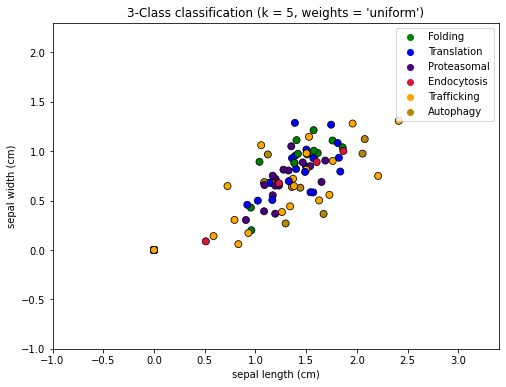

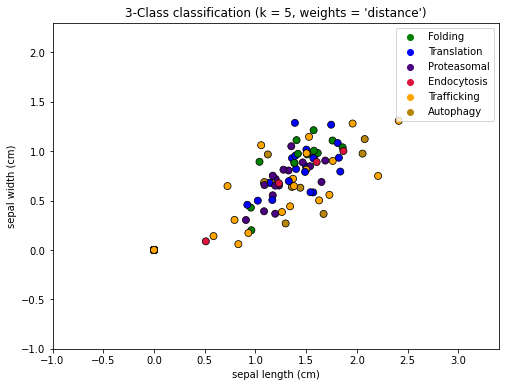

In [266]:
print(__doc__)

n_neighbors = 5

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = p67l
y = cp_paths['encode']

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['palegreen', 'skyblue', 'violet', 'lightcoral', 'lightpink', 'yellow'])
cmap_bold = ['green', 'blue', 'indigo', 'crimson', 'orange', 'darkgoldenrod']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    #plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=np.array(cp_paths['pathway']),
                    palette=cmap_bold, alpha=1.0, edgecolor="black", s=50)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

In [205]:
len(cp_df[x])

2302

0.11255568290148321
0.35382983165327697


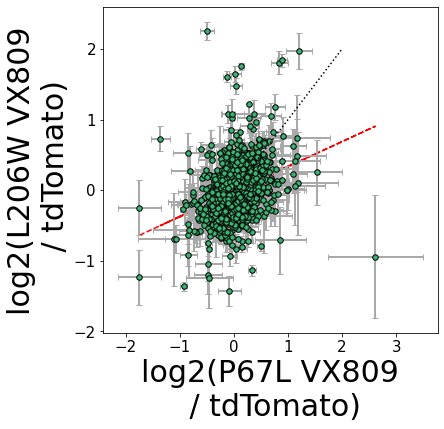

In [600]:
x = 'P67L VX809'
y = 'L206W VX809'
fontsize =30
idx = np.isfinite(cp_df[x]) & np.isfinite(cp_df[y])
m,b = np.polyfit(cp_df[x][idx], cp_df[y][idx], 1)


plt.figure(figsize=(6,6))
plt.plot([0,1,2], [0,1,2], ls=':', color='k')
plt.scatter(cp_df[x],cp_df[y] , color='mediumseagreen', edgecolor='k', s=30, zorder=1)
plt.errorbar(cp_df[x],cp_df[y], xerr=cp_df[x + ' err'], yerr = cp_df[x + ' err'],
             ls='none', ecolor='darkgrey', elinewidth=2, capsize=3, zorder=0 )
plt.plot(cp_df[x], m*cp_df[x] + b, color='r', ls='--', zorder=-1)

r2 = cp_df[[x, y]].corr('pearson').values[0,1]**2
plt.xlabel('log2('+ x + '\n / tdTomato)', size=fontsize)
plt.ylabel('log2('+ y + '\n / tdTomato)', size=fontsize)
plt.xticks(size=fontsize-15)
plt.yticks(size=fontsize-15)
#plt.xlim(0,2)
#plt.ylim(0,2)

#plt.text(np.amax(x), np.amax(y),'r^2 = '+ str(r2), )

print(r2)
print(m)

In [ ]:
x = 'F508del DMSO'
y = 'F508del VX809'
fontsize =30
idx = np.isfinite(cp_df[y]) & np.isfinite(cp_df[y])
m,b = np.polyfit(cp_df[x][idx], cp_df[y][idx], 1)


plt.figure(figsize=(6,6))
plt.plot([0,1,2], [0,1,2], ls=':', color='k')
plt.scatter(cp_df[x],cp_df[y] , color='dodgerblue', edgecolor='k', s=20, zorder=1)
#plt.errorbar(cp_df[x],cp_df[y], xerr=cp_df[x + ' err'], yerr = cp_df[x + ' err'],
 #            ls='none', ecolor='darkgrey', elinewidth=2, capsize=3, zorder=0 )
plt.plot(cp_df[x], m*cp_df[x] + b, color='r', ls='--', zorder=-1)

r2 = cp_df[[x, y]].corr('pearson').values[0,1]**2
plt.xlabel('log2('+ x + '\n / tdTomato)', size=fontsize)
plt.ylabel('log2('+ y + '\n / tdTomato)', size=fontsize)
plt.xticks(size=fontsize-15)
plt.yticks(size=fontsize-15)
plt.xlim(0,2)
plt.ylim(0,2)

#plt.text(np.amax(x), np.amax(y),'r^2 = '+ str(r2), )
#plt.savefig('../Figures/correlation_plots/P67L_F508del_DMSO_corr.svg', format='svg')
print(r2)

# Violin plots

In [576]:
to_heatmap_paths = to_heatmap
to_heatmap_paths = to_heatmap_paths.drop('pathway', axis = 1)
to_heatmap_paths = to_heatmap_paths.sub(to_heatmap_paths['WT DMSO'], axis=0)
to_heatmap_paths['pathway'] = to_heatmap['pathway']

In [578]:
deg_df = to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Degradation']

In [579]:
prot_df = to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Proteasomal']

In [580]:
cyto_df = to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Cytoskeleton']

In [581]:
ion_df = to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Ion Transport/ Transporter']

In [582]:
auto_df = to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Autophagy']

In [583]:
endo_df = to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Endocytosis']

In [584]:
fold_df = to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Folding']

In [585]:
traff_df = to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Trafficking']

In [586]:
MO_df = to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Membrane Organization']

In [587]:
transla_df = to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Translation']

In [588]:
transloc_df = to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Translocation']

/Users/elimcdonald/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


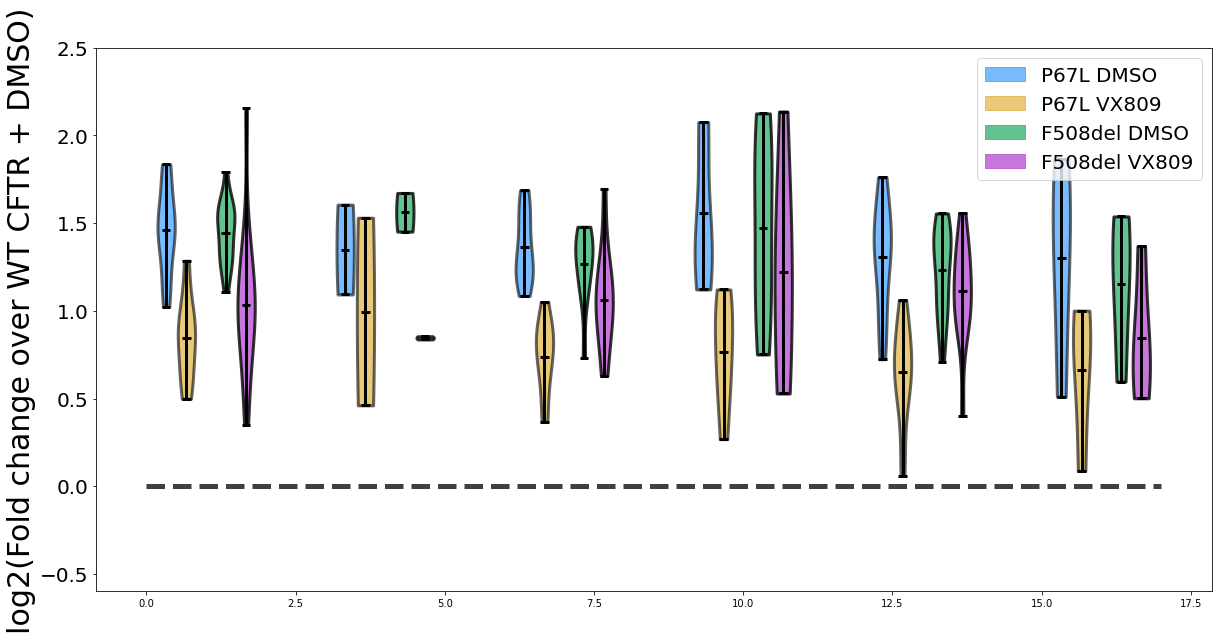

In [239]:
plt.figure(figsize=(20,10))
x0 = 'P67L DMSO'
x1 = 'P67L VX809'
x2 = 'F508del DMSO'
x3 = 'F508del VX809'
plt.hlines(0,0,17, ls='--', lw=5, color='k', alpha=0.75)

#paths = [transla_df, transloc_df, fold_df, prot_df, auto_df, endo_df, traff_df, MO_df,deg_df, cyto_df, ion_df]
paths = [ transla_df, fold_df, prot_df, auto_df, traff_df, endo_df,]
plt0 = [i[x0] for i in paths]
plt1 = [i[x1] for i in paths]
plt2 = [i[x2] for i in paths]
plt3 = [i[x3] for i in paths]

violin_parts0 = plt.violinplot(plt0,np.array([i*3 for i in np.arange(0,len(plt1))]) + 0.33, widths =.29, showmeans=1)

violin_parts1 = plt.violinplot(plt1,np.array([i*3 for i in np.arange(0,len(plt1))]) + 0.67, widths =.29, showmeans=1)
                       
violin_parts2 = plt.violinplot(plt2,np.array([i*3 for i in np.arange(0,len(plt1))]) + 1.33, widths =.29, showmeans=1)

violin_parts3 = plt.violinplot(plt3,np.array([i*3 for i in np.arange(0,len(plt1))]) + 1.67, widths =.29, showmeans=1)

plt.setp(violin_parts0['cmaxes'], color='k', linewidth =3)
plt.setp(violin_parts0['cmeans'], color='k', linewidth =3)
plt.setp(violin_parts0['cmins'], color='k', linewidth =3)
plt.setp(violin_parts0['cbars'], color='k', linewidth =3)
plt.setp(violin_parts0['bodies'], facecolor ='dodgerblue', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(violin_parts1['cmaxes'], color='k', linewidth =3)
plt.setp(violin_parts1['cmeans'], color='k', linewidth =3)
plt.setp(violin_parts1['cmins'], color='k', linewidth =3)
plt.setp(violin_parts1['cbars'], color='k', linewidth =3)
plt.setp(violin_parts1['bodies'], facecolor ='goldenrod', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(violin_parts2['cmaxes'], color='k', linewidth =3)
plt.setp(violin_parts2['cmeans'], color='k', linewidth =3)
plt.setp(violin_parts2['cmins'], color='k', linewidth =3)
plt.setp(violin_parts2['cbars'], color='k', linewidth =3)
plt.setp(violin_parts2['bodies'], facecolor ='mediumseagreen', edgecolor='k', alpha=0.8, linewidth =3) 

plt.setp(violin_parts3['cmaxes'], color='k', linewidth =3)
plt.setp(violin_parts3['cmeans'], color='k', linewidth =3)
plt.setp(violin_parts3['cmins'], color='k', linewidth =3)
plt.setp(violin_parts3['cbars'], color='k', linewidth =3)
plt.setp(violin_parts3['bodies'], facecolor ='mediumorchid', edgecolor='k', alpha=0.8, linewidth =3) 

#leg0 = mpatches.Patch(color='deepskyblue', label='WT DMSO')
leg1 = mpatches.Patch(color='dodgerblue', label=x0, alpha=0.6)
leg2 = mpatches.Patch(color='goldenrod', label=x1, alpha=0.6)
leg3 = mpatches.Patch(color='mediumseagreen', label=x2, alpha=0.8)
leg4 = mpatches.Patch(color='mediumorchid', label=x3, alpha=0.8)
plt.legend(handles=[leg1, leg2, leg3, leg4], fontsize=20)



plt.ylabel('log2(Fold change over WT CFTR + DMSO)', fontsize=30)
plt.yticks(size=20)
plt.ylim(-0.6, 2.5)

#plt.savefig('../Figures/Figure5_violin_plot_v2.svg', format='svg')
plt.show()

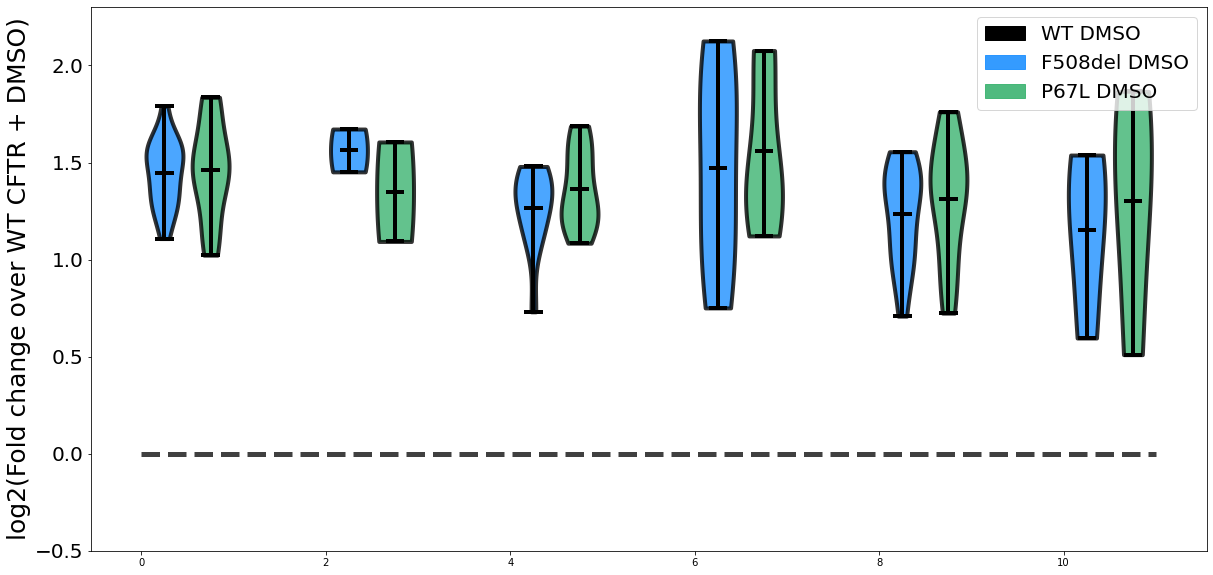

In [245]:
plt.figure(figsize=(20,10))
x0 = 'F508del DMSO'
x1 = 'P67L DMSO'

plt.hlines(0,0,11, ls='--', lw=5, color='k', alpha=0.75)

#paths = [transla_df, transloc_df, fold_df, prot_df, auto_df, endo_df, traff_df, MO_df,deg_df, cyto_df, ion_df]
paths = [  transla_df, fold_df, prot_df, auto_df, traff_df, endo_df]
plt0 = [i[x0] for i in paths]
plt1 = [i[x1] for i in paths]


violin_parts0 = plt.violinplot(plt0,np.array([i*2 for i in np.arange(0,len(plt1))]) + .25 ,widths =.4, showmeans=1)

violin_parts1 = plt.violinplot(plt1,np.array([i*2 for i in np.arange(0,len(plt1))]) + .75 ,widths =.4, showmeans=1)

plt.setp(violin_parts0['cmaxes'], color='k', linewidth =4)
plt.setp(violin_parts0['cmeans'], color='k', linewidth =4)
plt.setp(violin_parts0['cmins'], color='k', linewidth =4)
plt.setp(violin_parts0['cbars'], color='k', linewidth =4)
plt.setp(violin_parts0['bodies'], facecolor ='dodgerblue', edgecolor='k', alpha=0.8, linewidth =4)

plt.setp(violin_parts1['cmaxes'], color='k', linewidth =4)
plt.setp(violin_parts1['cmeans'], color='k', linewidth =4)
plt.setp(violin_parts1['cmins'], color='k', linewidth =4)
plt.setp(violin_parts1['cbars'], color='k', linewidth =4)
plt.setp(violin_parts1['bodies'], facecolor ='mediumseagreen', edgecolor='k', alpha=0.8, linewidth =4)

leg0 = mpatches.Patch(color='k', label='WT DMSO')
leg1 = mpatches.Patch(color='dodgerblue', label=x0, alpha=0.9)
leg2 = mpatches.Patch(color='mediumseagreen', label=x1, alpha=0.9)

plt.legend(handles=[leg0, leg1, leg2], fontsize=20)
plt.ylim(-0.5, 2.3)


plt.ylabel('log2(Fold change over WT CFTR + DMSO)', fontsize=25)
plt.yticks(size=20)

#plt.savefig('../Figures/Fig3_violin_plot_v2.svg', format='svg')
plt.show()

## Revisions Request 

In [372]:

df1=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Apoptosis']
df2=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Calcium signaling']
df3=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Cell adhesion']
df4=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Cytoskeleton']
df5=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'DNA Binding']
df6=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'DNA repair']

df7=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'DNA replication/ elongation']
df8=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Differentiation']
df9=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'ER targeting']
df10=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Lipid Metabolism']
df11=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Metabolism']
df12=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Metal ion binding']

df13=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'N-glycosylation']
df14=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Nuclear import / export']
df15=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Oxidative Stress Response']
df16=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'RNA binding']
df17=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'RNA processing']
df18=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'RNA processing/ RNA silencing']

df19=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'RNA-binding']
df20=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Signaling']
df21=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Oxidative Stress Response']
df22=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Transcription']
df23=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Uncharacterized']
df24=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'post translational modification']


In [649]:
paths_dict = {'1': df1, '2': df2, '3': df3, '4': df4,'5': df5, '6': df6,
              '7': df7, '8': df8, '9': df9, '10': df10, '11': df11,'12': df12,
              '13': df13, '14': df14, '15': df15, '16': df16, '17': df17,'18': df18,
              '19': df19, '20': df20, '21': df21, '22': df22, '23': df23,'24': df24,}

In [469]:
from scipy.stats import gaussian_kde

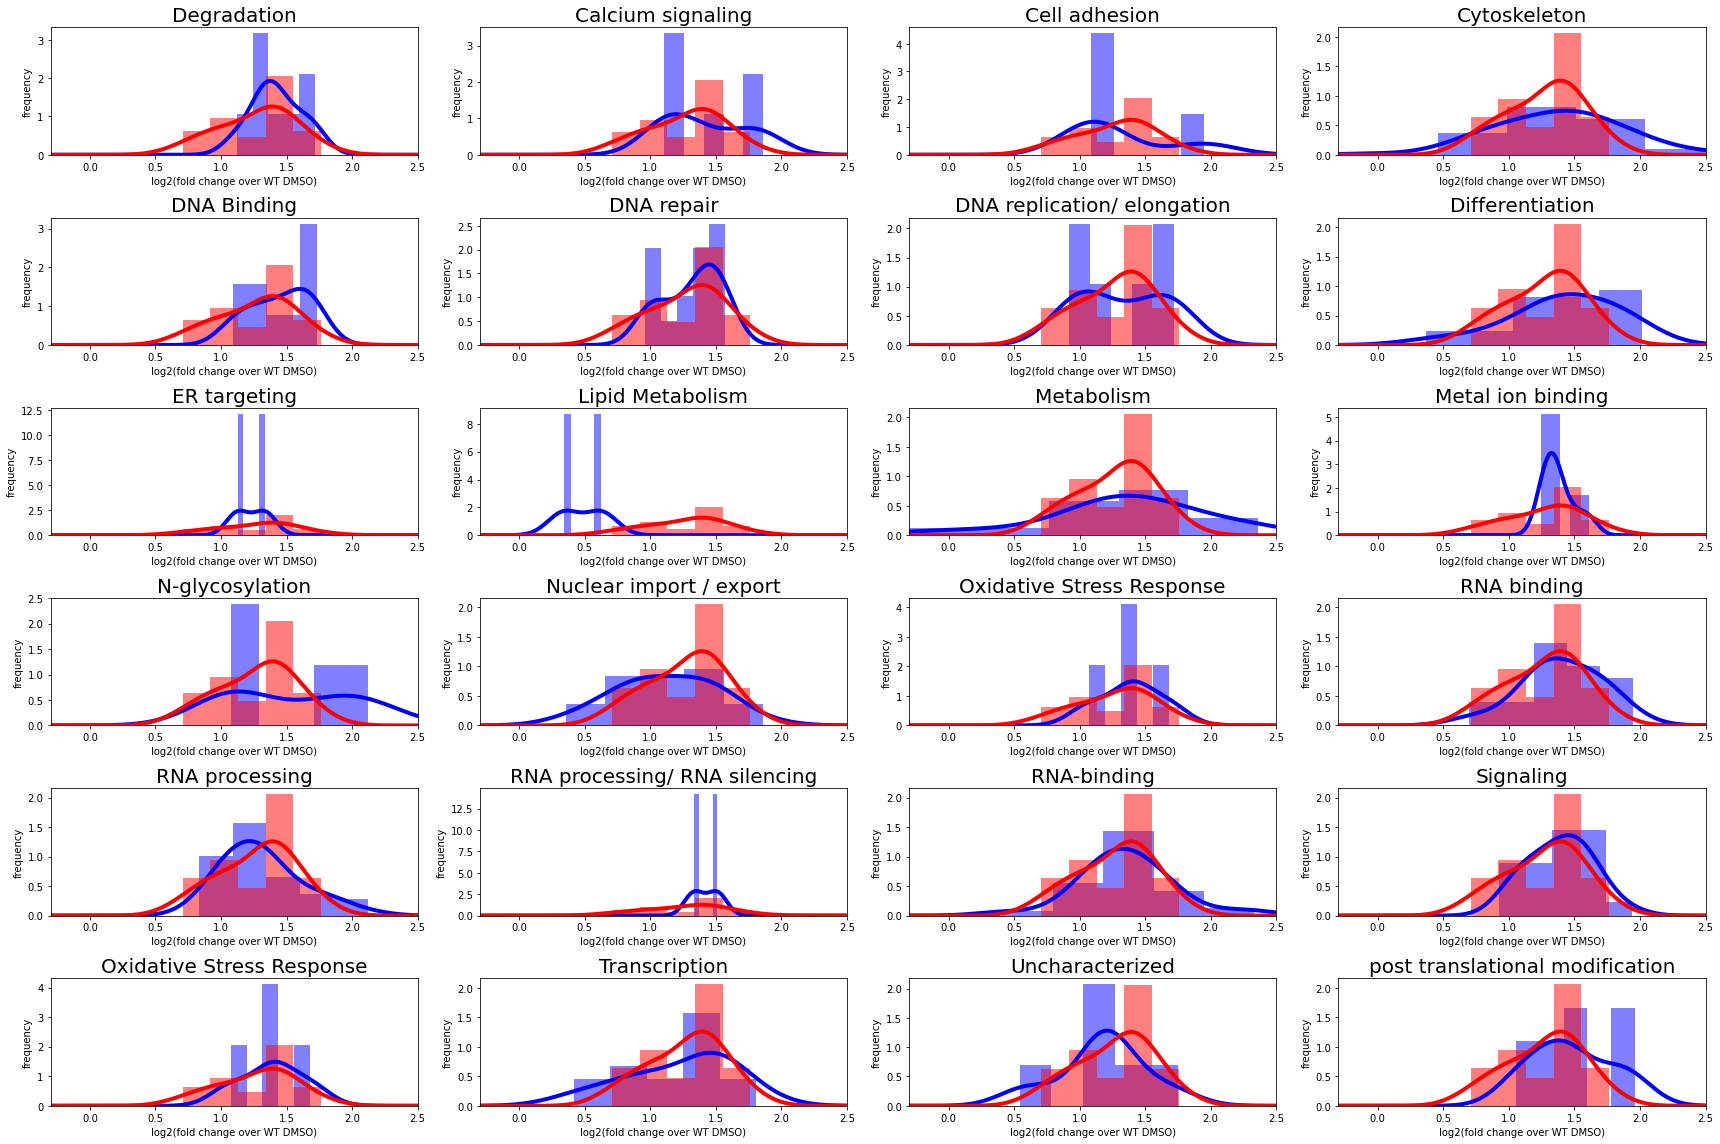

In [659]:
fig, axs = plt.subplots(6, 4, tight_layout=True)
fig.set_figheight(16)
fig.set_figwidth(24)
bin_num = 5
count = 0
for i in [0,1,2,3,4,5,]:
    for j in [0,1,2,3]:
        count +=1
        axs[i,j].set_xlim([-0.3, 2.5])
        #ax[i,j].set_ylim([0, 5])
        axs[i,j].set_title(paths_dict[str(count)]['pathway'][0], size=20)
        #axs[i,j].hist(paths_dict[str(count)]['F508del DMSO'],          
         #             bins=bin_num, color='blue', density=True, alpha=1)
        #axs[i,j].hist(fold_df['F508del DMSO'], bins=bin_num, color='red', density=True, alpha=0.5)
        axs[i,j].set_xlabel('log2(fold change over WT DMSO)')
        axs[i,j].set_ylabel('frequency')
                
        data1 = np.concatenate([paths_dict[str(count)]['F508del DMSO'], paths_dict[str(count)]['P67L DMSO']])
        density1 = gaussian_kde(data1)
        xrng = np.linspace(-0.5,2.5,200)
        density1.covariance_factor = lambda : .6
        density1._compute_covariance()
        
        data2 = np.concatenate([traff_df['F508del DMSO'], traff_df['P67L DMSO']])
        density2 = gaussian_kde(data2)
        xrng = np.linspace(-0.5,2.5,200)
        density2.covariance_factor = lambda : .6
        density2._compute_covariance()
        
        axs[i,j].plot(xrng, density1(xrng), color = 'blue', lw=4)
        axs[i,j].plot(xrng, density2(xrng), color = 'red', lw=4)
        
        axs[i,j].hist(data1,bins=bin_num, color='blue', density=True, alpha=0.5)
        axs[i,j].hist(data2,bins=bin_num, color='red', density=True, alpha=0.5)


plt.show()

In [509]:
cyto_df=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Cytoskeleton']
diff_df=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Differentiation']
meta_df=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Metabolism']
nuc_df=to_heatmap_paths.loc[to_heatmap_paths['pathway'] == 'Nuclear import / export']

In [517]:
paths_dict = {'1': cyto_df, '2': diff_df, '3': meta_df, '4': nuc_df}

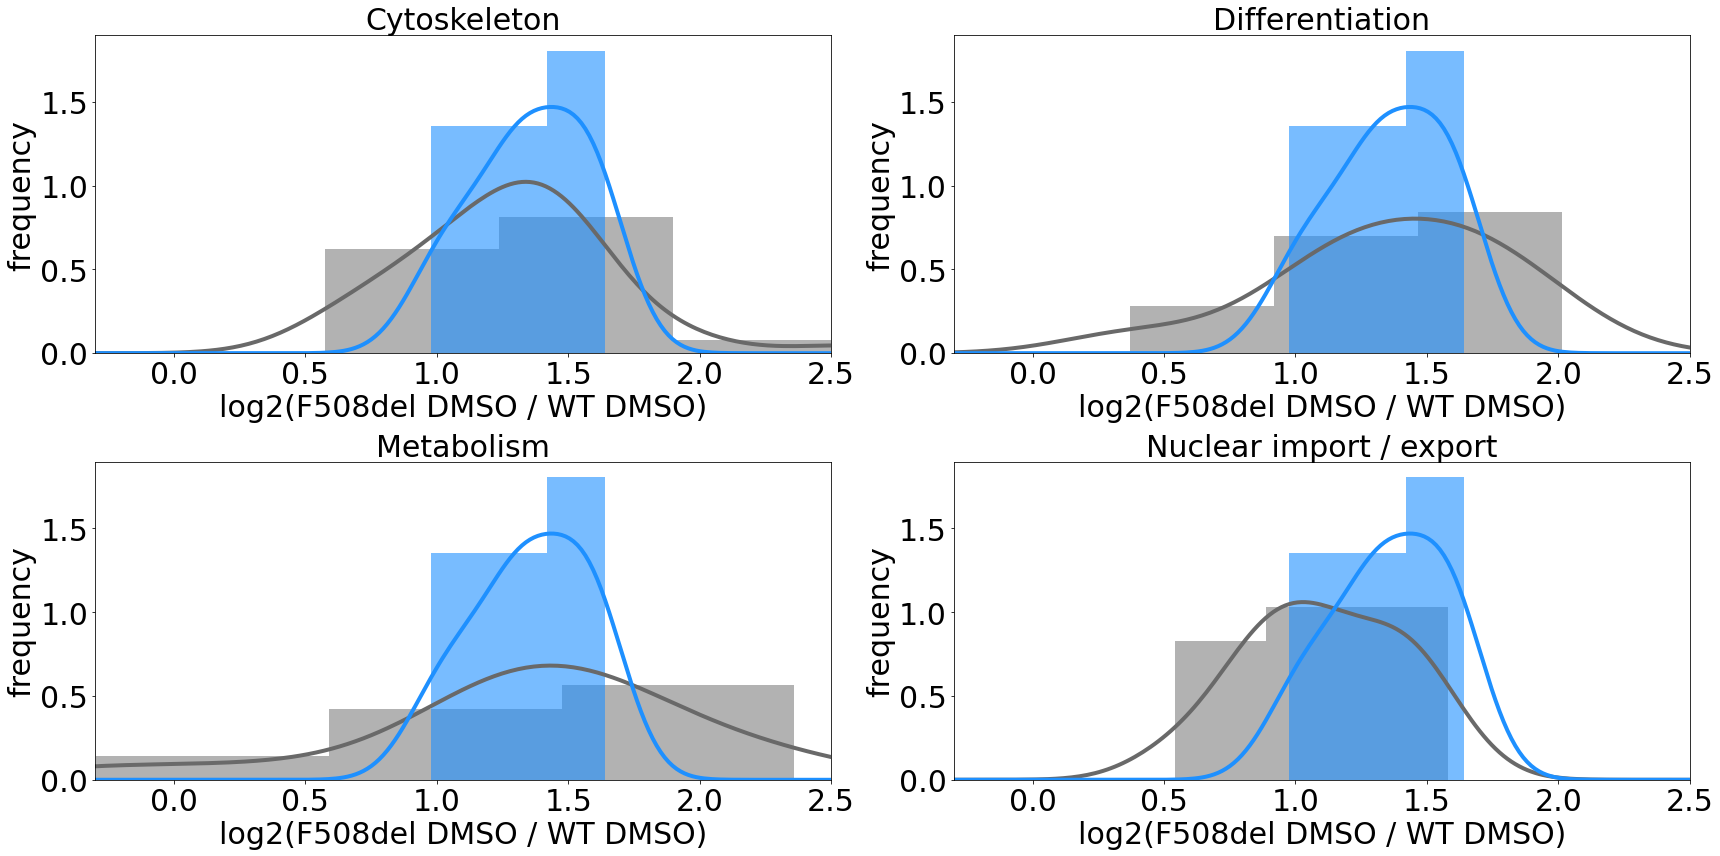

In [547]:
fig, axs = plt.subplots(2, 2, tight_layout=True)
fig.set_figheight(12)
fig.set_figwidth(24)
fig.tight_layout(pad=10)
bin_num = 3
count = 0
for i in [0,1]:
    for j in [0,1]:
        count +=1
        axs[i,j].set_xlim([-0.3, 2.5])
        axs[i,j].set_title(paths_dict[str(count)]['pathway'][0], size=30)
        axs[i,j].set_xlabel('log2(F508del DMSO / WT DMSO)', size=30)
        axs[i,j].set_ylabel('frequency', size=30)
        axs[i,j].tick_params('both',  labelsize=30)
                
        data1 = paths_dict[str(count)]['F508del DMSO']
        density1 = gaussian_kde(data1)
        xrng = np.linspace(-0.5,2.5,200)
        density1.covariance_factor = lambda : .6
        density1._compute_covariance()
        
        data2 = fold_df['F508del DMSO']
        density2 = gaussian_kde(data2)
        xrng = np.linspace(-0.5,2.5,200)
        density2.covariance_factor = lambda : .6
        density2._compute_covariance()
        
        axs[i,j].plot(xrng, density1(xrng), color = 'dimgrey', lw=4)
        axs[i,j].plot(xrng, density2(xrng), color = 'dodgerblue', lw=4)
        
        axs[i,j].hist(data1,bins=bin_num, color='grey', density=True, alpha=0.6)
        axs[i,j].hist(data2,bins=bin_num, color='dodgerblue', density=True, alpha=0.6)


#plt.savefig('../Figures/Supplemental/F508del_not_CF_pathway_upregulation.svg', format='svg')
plt.show()

In [305]:
prot_df.to_excel('../Supplemental_Materials/Pathway_anaylsis_excels/proteasomal_degradation.xlsx')

In [306]:
auto_df.to_excel('../Supplemental_Materials/Pathway_anaylsis_excels/autophagy_degradation.xlsx')

In [307]:
fold_df.to_excel('../Supplemental_Materials/Pathway_anaylsis_excels/folding.xlsx')

In [308]:
transla_df.to_excel('../Supplemental_Materials/Pathway_anaylsis_excels/translation.xlsx')
endo_df.to_excel('../Supplemental_Materials/Pathway_anaylsis_excels/endocytosis.xlsx')
traff_df.to_excel('../Supplemental_Materials/Pathway_anaylsis_excels/trafficking.xlsx')

In [309]:
transloc_df.to_excel('../Supplemental_Materials/Pathway_anaylsis_excels/translocation.xlsx')

In [310]:
deg_df.to_excel('../Supplemental_Materials/Pathway_anaylsis_excels/degradation.xlsx')

In [311]:
MO_df.to_excel('../Supplemental_Materials/Pathway_anaylsis_excels/membrane_organization.xlsx')

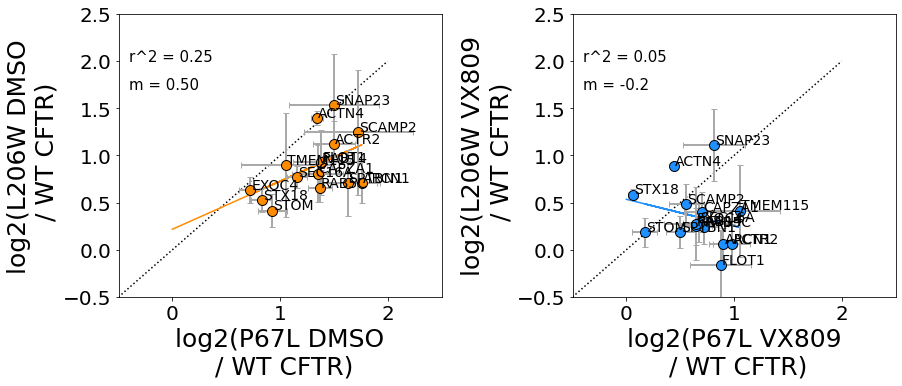

In [646]:
x = 'P67L DMSO'
y = 'L206W DMSO'

x1 = 'P67L VX809'
y1 = 'L206W VX809'

nx1 = len(P67L_DMSO)
ny1 = len(L206W_DMSO)

nx2 = len(P67L_VX809)
ny2 = len(L206W_VX809)


df = traff_df


fig,ax = plt.subplots(1,2, figsize=(14,7))
fig.tight_layout(pad=10.0)

ax[0].plot([-1,0,1,2],[-1,0,1,2], color='k', ls=':', zorder=-2)
ax[1].plot([-1,0,1,2],[-1,0,1,2], color='k', ls=':', zorder=-2)
fontsize =25

idx = np.isfinite(df[y]) & np.isfinite(df[y])
m,b = np.polyfit(df[x][idx], df[y][idx], 1)


idx1 = np.isfinite(df[y]) & np.isfinite(df[y1])
m1,b1 = np.polyfit(df[x1][idx1], df[y1][idx1], 1)

r2 = df[[x, y]].corr('pearson').values[0,1]**2
r2_1 = df[[x1, y1]].corr('pearson').values[0,1]**2

ax[0].scatter(df[x], df[y] , color='darkorange', edgecolor='k', s=100, zorder=1)
ax[0].errorbar(df[x],df[y], xerr=df[x + ' std']/np.sqrt(nx1), yerr = df[x + ' std']/np.sqrt(ny1),
             ls='none', ecolor='darkgrey', elinewidth=2, capsize=3, zorder=0 )
ax[0].plot(np.concatenate([[0.0],df[x]]), m*np.concatenate([[0],df[x]]) + b, color='darkorange', ls='-', zorder=-1)
ax[0].text(-0.4,2,'r^2 = '+ str(r2)[:4], size=fontsize-10)
ax[0].text(-0.4,1.7,'m = '+ str(m)[:4], size=fontsize-10)

ax[1].scatter(df[x1], df[y1] , color='dodgerblue', edgecolor='k', s=100, zorder=1)
ax[1].errorbar(df[x1],df[y1], xerr=df[x1 + ' std']/np.sqrt(nx2), yerr = df[x1 + ' std']/np.sqrt(ny2),
             ls='none', ecolor='darkgrey', elinewidth=2, capsize=3, zorder=0 )
ax[1].plot(np.concatenate([[0.0],df[x1]]), m1*np.concatenate([[0],df[x1]]) + b1, color='dodgerblue', ls='-', zorder=-1)
ax[1].text(-0.4,2,'r^2 = '+ str(r2_1)[:4], size=fontsize-10)
ax[1].text(-0.4,1.7,'m = '+ str(m1)[:4], size=fontsize-10)



for i in df.index:

    ax[0].text(df.loc[i][x]+0.01, df.loc[i][y]+0.01, i, size=14)
    ax[1].text(df.loc[i][x1]+0.01, df.loc[i][y1]+0.01, i, size=14)

ax[0].set_xlabel('log2('+ x + '\n / WT CFTR)', size=fontsize)
ax[0].set_ylabel('log2('+ y + '\n / WT CFTR)', size=fontsize)
ax[0].set_xlim(-0.5,2.5)
ax[0].set_ylim(-0.5,2.5)
ax[0].tick_params(axis='both', which='major', labelsize=fontsize-5)

ax[1].set_xlabel('log2('+ x1 + '\n / WT CFTR)', size=fontsize)
ax[1].set_ylabel('log2('+ y1 + '\n / WT CFTR)', size=fontsize)
ax[1].set_xlim(-0.5,2.5)
ax[1].set_ylim(-0.5,2.5)
ax[1].tick_params(axis='both', which='major', labelsize=fontsize-5)


plt.savefig('../Figures/correlation_plots/P67L_L206W_trafficking.svg', format='svg')


In [549]:
len(P67L_DMSO)

12

r^2 = 0.010041419465663316
m = 0.14358973638436454


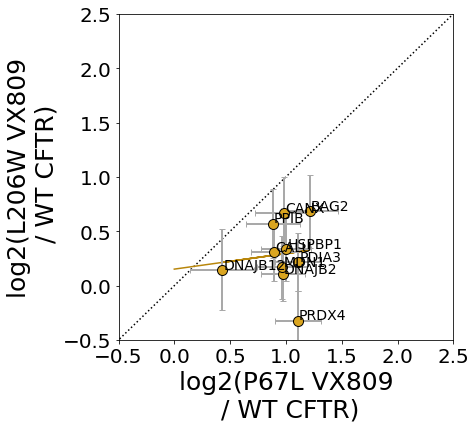

In [596]:
x = 'P67L VX809'
y = 'L206W VX809'
nx = len(P67L_DMSO)
ny = len(L206W_DMSO)
df = translat_df


plt.figure(figsize=(6,6))
plt.plot([-1,0,1,2.5],[-1,0,1,2.5], color='k', ls=':', zorder=-2)
fontsize =25

idx = np.isfinite(df[y]) & np.isfinite(df[y])
m,b = np.polyfit(df[x][idx], df[y][idx], 1)


plt.scatter(df[x], df[y] , color='goldenrod', edgecolor='k', s=100, zorder=1)
plt.errorbar(df[x],df[y], xerr=df[x + ' std']/np.sqrt(nx), yerr = df[x + ' std']/np.sqrt(ny),
             ls='none', ecolor='darkgrey', elinewidth=2, capsize=3, zorder=0 )


plt.plot(np.concatenate([[0.0],df[x]]), m*np.concatenate([[0],df[x]]) + b, color='darkgoldenrod', ls='-', zorder=-1)

r2 = df[[x, y]].corr('pearson').values[0,1]**2

for i in df.index:

    plt.text(df.loc[i][x]+0.01, df.loc[i][y]+0.01, i, size=14)


plt.xlabel('log2('+ x + '\n / WT CFTR)', size=fontsize)
plt.ylabel('log2('+ y + '\n / WT CFTR)', size=fontsize)
plt.xlim(-0.5,2.5)
plt.ylim(-0.5,2.5)
plt.xticks(size=fontsize-5)
plt.yticks(size=fontsize-5)


print('r^2 = ' + str(r2))

print('m = ' + str(m))
